# Analisis de superficial del csv de clicks
### En este notebook exploramos los registros del csv con el objetivo de buscar relaciones entre las distintas variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Leemos el csv, y dropeamos las columnas action_id por estar llena de nans y wifi_connection por estar llena de False

In [2]:
installs = pd.read_csv("data/installs.csv")
''', dtype={'auction_type_id': 'float64', 'country': 'int64', 'date': 'str',
                                                   'device_id': 'int64', 'platform':'int64', 'ref_type_id': 'int64',
                                                   'source_id':'int64'}, parse_dates = ['date'])'''
installs.drop('click_hash', axis=1, inplace = True)
installs.drop('attributed', axis=1, inplace = True)
installs['created'] = pd.to_datetime(installs['created'], errors = 'coerce')
installs['day'] = installs['created'].dt.date
installs['hour'] = installs['created'].dt.hour
installs.head(5)

created  application_id             ref_type  \
0 2019-03-13 01:43:33.445               0  1891515180541284343   
1 2019-03-13 04:58:35.078               0  1891515180541284343   
2 2019-03-13 04:20:57.666               0  1891515180541284343   
3 2019-03-13 04:20:57.698               0  1891515180541284343   
4 2019-03-10 22:24:56.684               0  1891515180541284343   

              ref_hash  implicit   device_countrycode  device_brand  \
0  8464844987297247076     False  6333597102633388268  3.083059e+17   
1  3250564871270161533     False  6333597102633388268  3.083059e+17   
2  7953318831018100268      True  6333597102633388268  5.137992e+17   
3  7953318831018100268     False  6333597102633388268  5.137992e+17   
4  8355110941557237501      True  6333597102633388268  1.083369e+18   

   device_model                 session_user_agent user_agent  \
0  4.445252e+18                                NaN        NaN   
1  4.445252e+18                                NaN        NaN   
2  6.026543e+18  HasOffers Mobile AppTracking v1.0        NaN   
3  6.026543e+18                                NaN        NaN   
4  7.876612e+18  HasOffers Mobile AppTracking v1.0        NaN   

                             event_uuid  kind wifi trans_id  \
0                                   NaN   NaN  NaN      NaN   
1                                   NaN   NaN  NaN      NaN   
2  0bfa9b4c-e07a-4522-b32d-138e3165ac98  Open  NaN      NaN   
3                                   NaN   NaN  NaN      NaN   
4  8f235a8c-41bf-4399-b33d-c41577c949b0  Open  NaN      NaN   

            ip_address  device_language         day  hour  
0  5529284367937637301              NaN  2019-03-13     1  
1  6098022721363533304              NaN  2019-03-13     4  
2  4636407223847323867     3.301378e+18  2019-03-13     4  
3  4636407223847323867              NaN  2019-03-13     4  
4   685400811232710215     3.301378e+18  2019-03-10    22

## Revisamos el tipo de cada columna

In [3]:
installs.dtypes

created               datetime64[ns]
application_id                 int64
ref_type                       int64
ref_hash                       int64
implicit                        bool
device_countrycode             int64
device_brand                 float64
device_model                 float64
session_user_agent            object
user_agent                    object
event_uuid                    object
kind                          object
wifi                          object
trans_id                      object
ip_address                     int64
device_language              float64
day                           object
hour                           int64
dtype: object

## Vemos una descripcion general de las columnas numericos

In [4]:
installs.describe()

application_id      ref_type      ref_hash  device_countrycode  \
count     3412.000000  3.412000e+03  3.412000e+03        3.412000e+03   
mean        10.247655  1.736533e+18  4.598202e+18        4.764401e+18   
std          6.016194  1.936976e+17  2.663828e+18        1.678051e+18   
min          0.000000  1.494519e+18  4.958527e+15        2.970471e+18   
25%          7.000000  1.494519e+18  2.268353e+18        2.970471e+18   
50%          9.000000  1.891515e+18  4.603807e+18        6.333597e+18   
75%         10.000000  1.891515e+18  6.912404e+18        6.333597e+18   
max         36.000000  1.891515e+18  9.218934e+18        6.333597e+18   

       device_brand  device_model    ip_address  device_language         hour  
count  1.047000e+03  3.411000e+03  3.412000e+03     3.378000e+03  3412.000000  
mean   1.877864e+18  4.245276e+18  4.562040e+18     4.915828e+18    13.398300  
std    1.886461e+18  2.620844e+18  2.683422e+18     2.477019e+18     7.373674  
min    3.083059e+17  5.112505e+16  7.118754e+15     1.101539e+17     0.000000  
25%    3.083059e+17  2.331947e+18  2.249197e+18     3.301378e+18     8.000000  
50%    2.208835e+18  2.983638e+18  4.436113e+18     3.301378e+18    15.000000  
75%    2.523246e+18  6.882415e+18  7.017564e+18     6.977049e+18    19.000000  
max    9.169527e+18  9.222450e+18  9.221950e+18     9.028383e+18    23.000000

## Revisamos la correlacion entre las variables

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


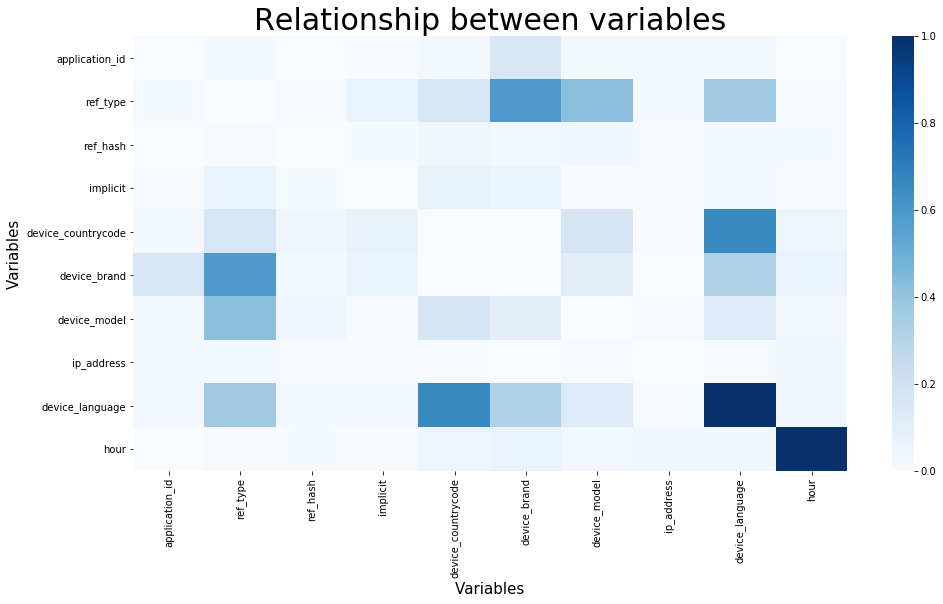

In [5]:
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
cor = installs.corr().abs()
cor.values[[np.arange(8)]*2] = 0
sns.heatmap(cor,cmap='Blues');
ax.axes.set_title("Relationship between variables",fontsize=30)
ax.set_xlabel("Variables",fontsize=15)
ax.set_ylabel("Variables",fontsize=15)
ax.tick_params(labelsize=10)

## Vemos el value_counts de cada columna para buscar las que tengan menor entropia

In [6]:
for i in installs.columns: 
    print('Columna: ' + str(i))
    print(installs[str(i)].value_counts())
    print('\n')

Columna: created
2019-03-09 04:34:41.291    1
2019-03-10 03:19:41.180    1
2019-03-08 02:43:15.289    1
2019-03-06 11:58:15.056    1
2019-03-09 09:17:58.182    1
2019-03-09 15:24:04.766    1
2019-03-11 21:27:24.576    1
2019-03-10 02:05:24.970    1
2019-03-10 14:02:24.193    1
2019-03-12 12:57:54.086    1
2019-03-08 23:48:14.760    1
2019-03-05 16:41:55.970    1
2019-03-06 15:17:52.310    1
2019-03-05 03:15:15.066    1
2019-03-12 03:22:54.225    1
2019-03-10 20:12:16.637    1
2019-03-08 19:35:36.677    1
2019-03-08 00:33:56.224    1
2019-03-06 19:14:40.704    1
2019-03-10 20:12:41.125    1
2019-03-08 19:02:04.147    1
2019-03-07 00:06:58.976    1
2019-03-08 20:51:30.973    1
2019-03-10 02:37:59.576    1
2019-03-10 15:54:16.375    1
2019-03-05 21:55:35.124    1
2019-03-11 23:09:48.437    1
2019-03-13 20:03:33.904    1
2019-03-12 00:32:29.716    1
2019-03-11 23:57:55.989    1
                          ..
2019-03-06 20:46:53.558    1
2019-03-08 08:20:38.145    1
2019-03-08 15:12:48.380   

## Elegimos las columnas con menor entropia o pocos valores diferentes y nos quedamos con los 5 valores mas comunes

In [7]:
grupos = ['application_id', 'ref_type', 'implicit', 'device_countrycode', 'device_brand', 'device_model', 'session_user_agent', 'kind', 'wifi', 'device_language', 'ip_address']#, 'hour', 'day']
top5 = {}
for i in grupos:
    top5[i]= installs[i].value_counts().head(5).index.tolist()
top5

{'application_id': [7, 9, 10, 16, 8],
 'device_brand': [3.083058605577787e+17,
  2.2088346671269993e+18,
  2.523245982232924e+18,
  5.951324980112395e+18,
  2.987569314309514e+18],
 'device_countrycode': [6333597102633388268, 2970470518450881158],
 'device_language': [3.3013777759777e+18,
  9.0283826551012e+18,
  4.621024053086952e+18,
  6.977049253562487e+18,
  4.077062198952597e+17],
 'device_model': [2.33194661091417e+18,
  6.88241452041436e+18,
  2.616228068988996e+18,
  7.787530752469096e+18,
  2.9282623200704937e+18],
 'implicit': [False, True],
 'ip_address': [1992632945768888579,
  2403839579048525602,
  2394721645995561079,
  589886713227299026,
  8262991154202232888],
 'kind': ['af_app_opened',
  'app_open',
  'EVENT_Homepage',
  'open',
  'EVENT_OPEN_APP'],
 'ref_type': [1891515180541284343, 1494519392962156891],
 'session_user_agent': ['http-kit/2.0',
  'adjust.com',
  'HasOffers Mobile AppTracking v1.0',
  'Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_4 like Mac OS X) AppleWebK

## Realizamos la distribucion general de estas columnas para esos valores

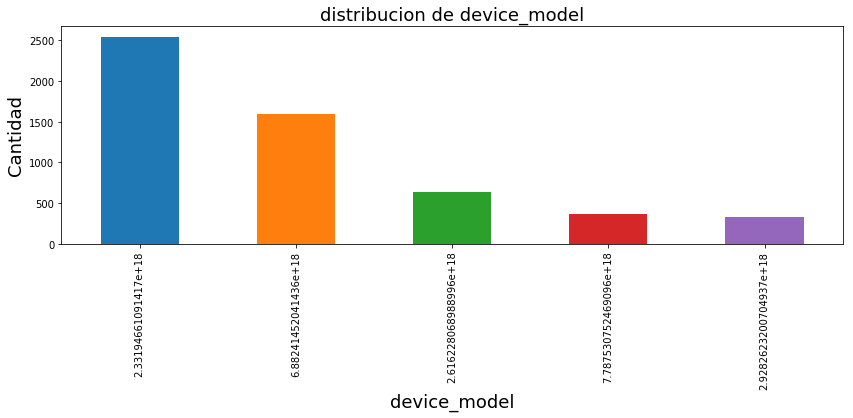

In [8]:
def barplot_simple(i):
    installs_filtrado = installs.loc[installs[i].isin(top5[i])][i]
    if installs_filtrado.empty:
        print('no pude hacer barplot de' + i)
        return
    plot = installs_filtrado.value_counts().plot(kind='bar',figsize=(14,4));
    plot.set_title('distribucion de ' + i, fontsize=18)
    plot.set_xlabel(i,fontsize=18)
    plot.set_ylabel('Cantidad', fontsize=18)
    plt.savefig('installs/top5'+str(i)+'.png', bbox_inches = 'tight')
    
for i in top5.keys():
    barplot_simple(i)

## Realizamos la distribucion de cada columna con respecto a las otras

/home/gonzalo/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


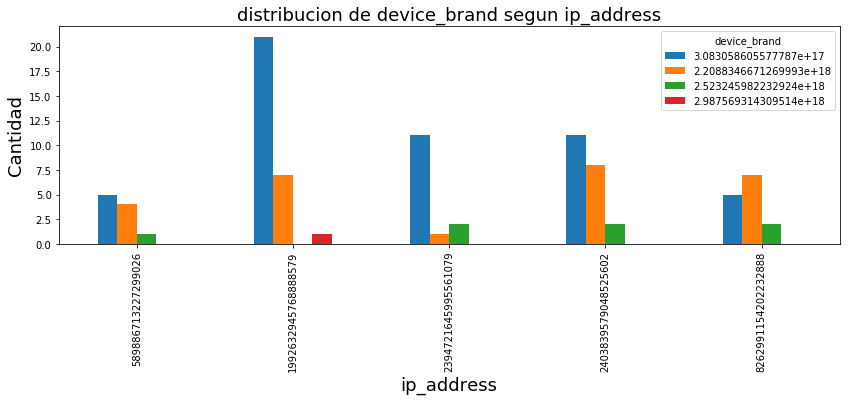

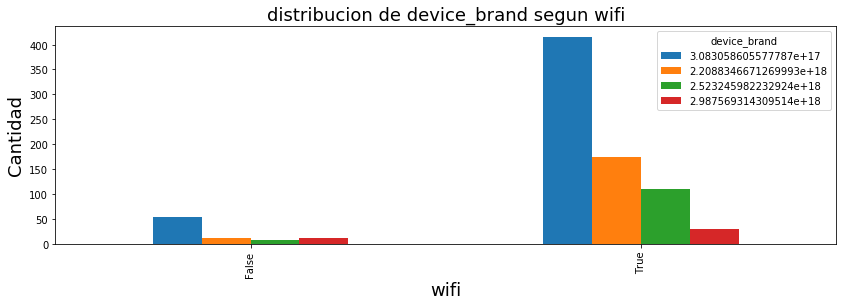

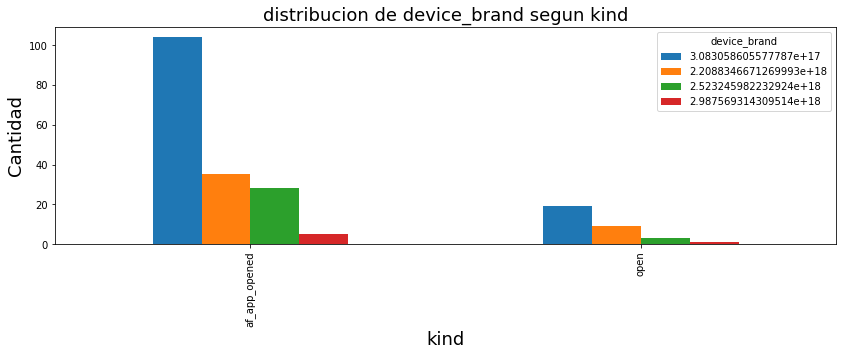

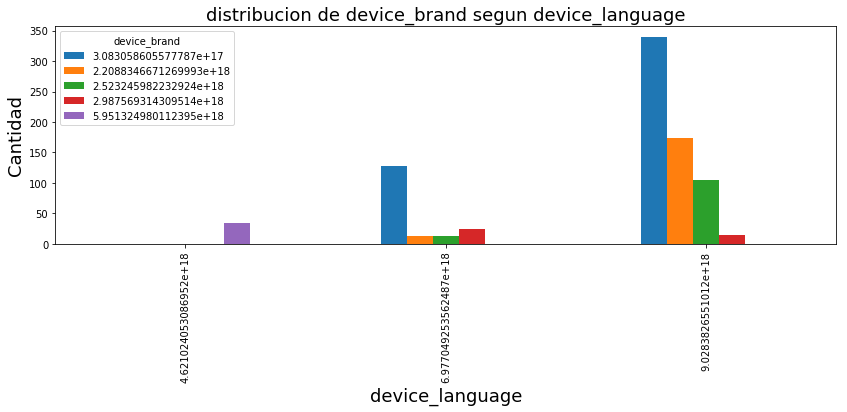

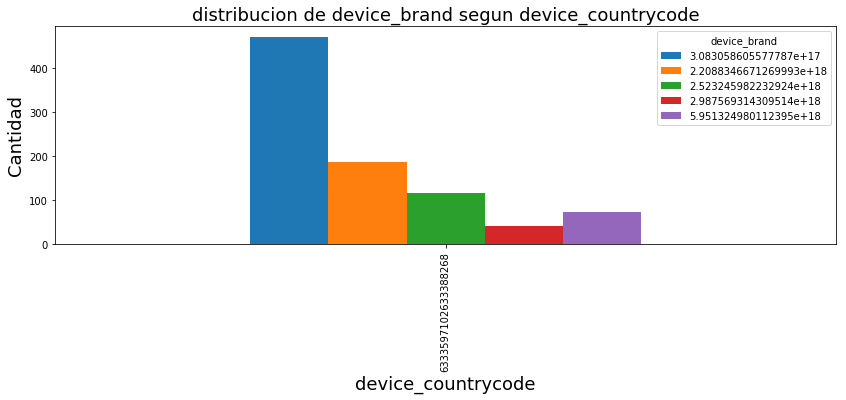

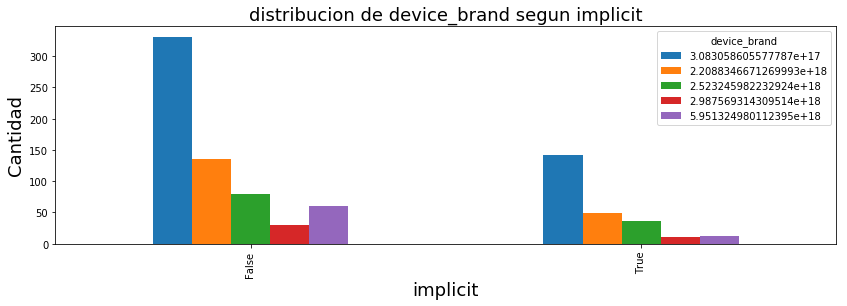

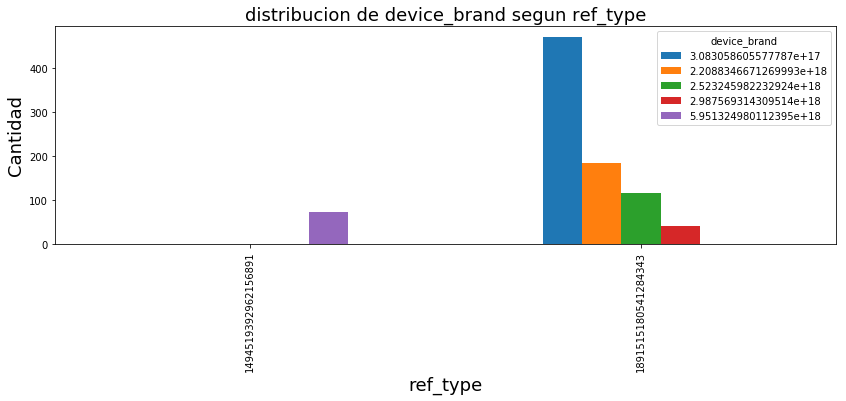

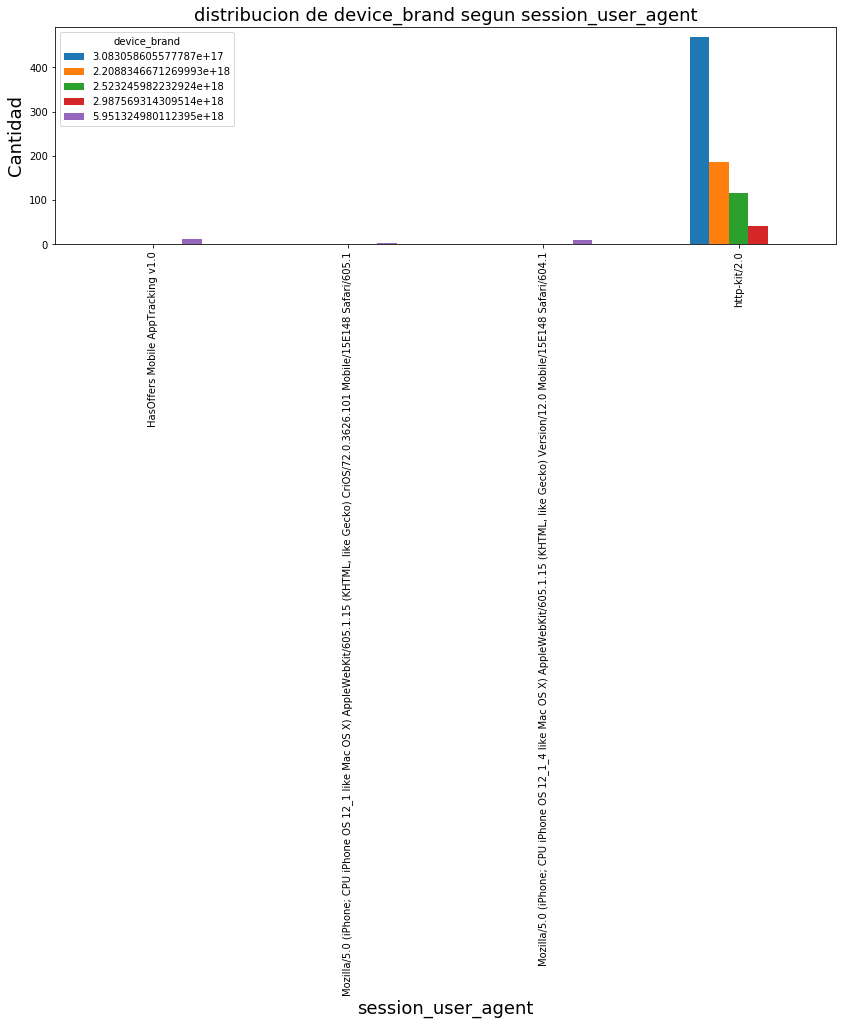

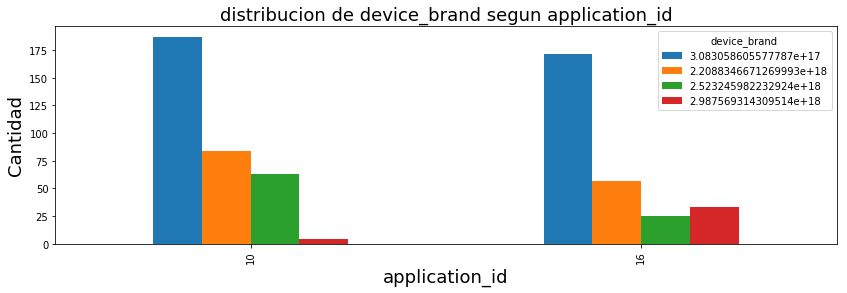

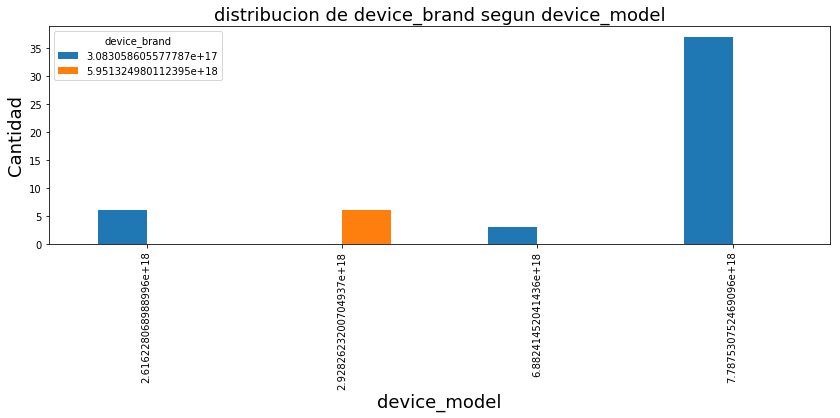

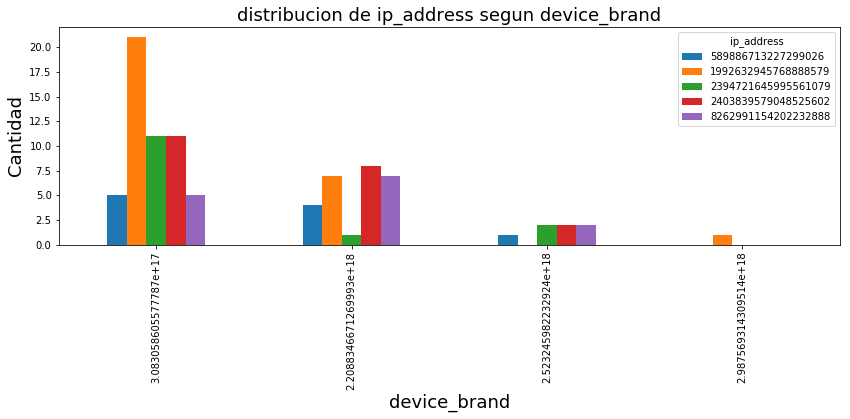

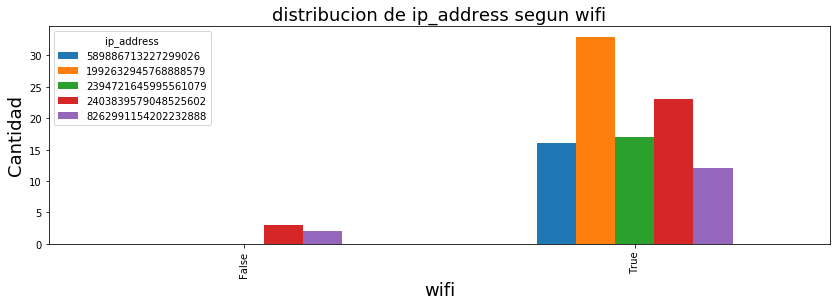

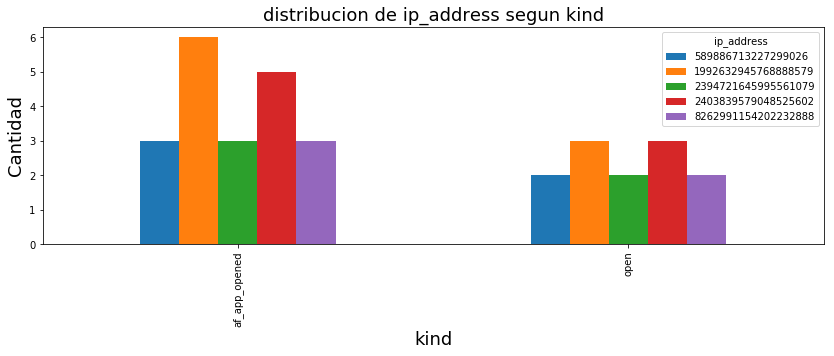

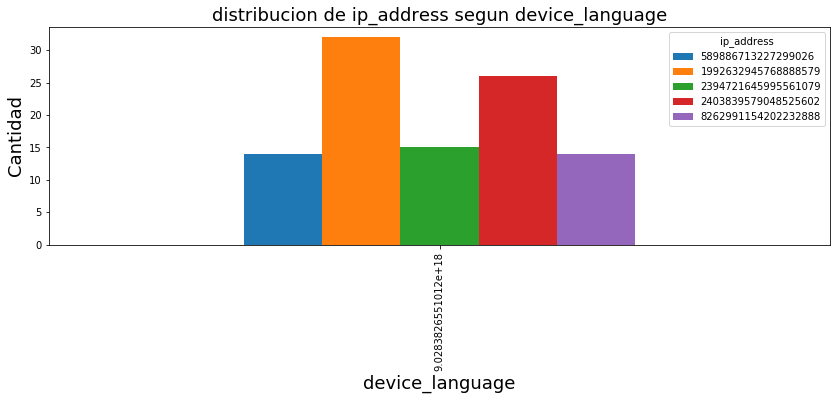

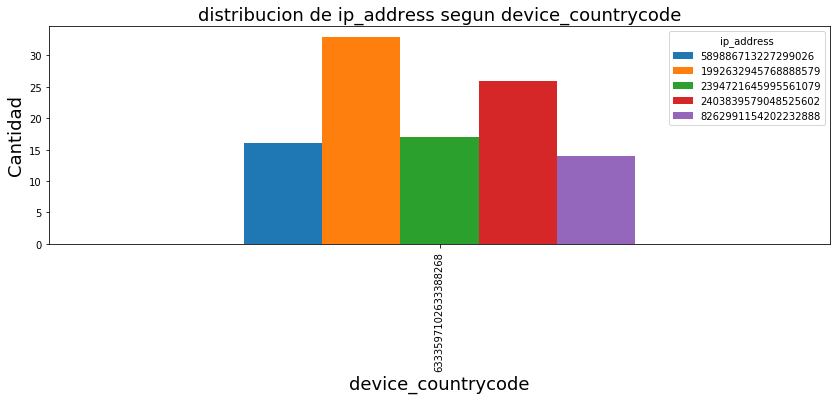

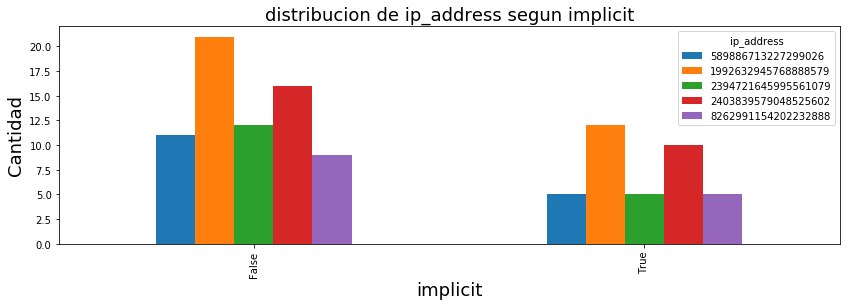

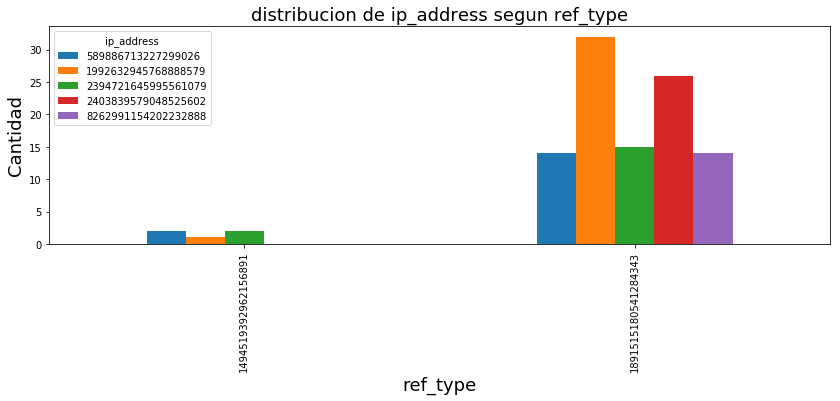

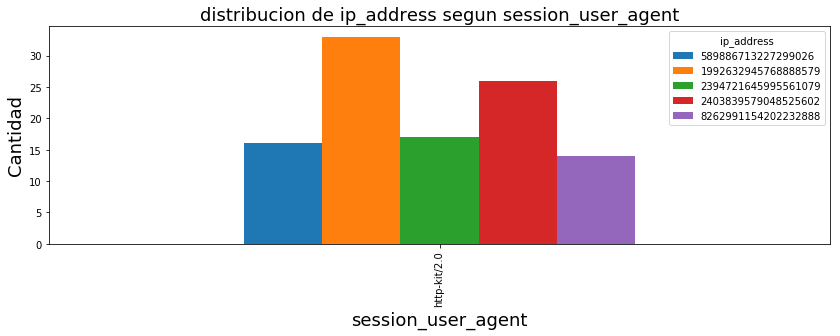

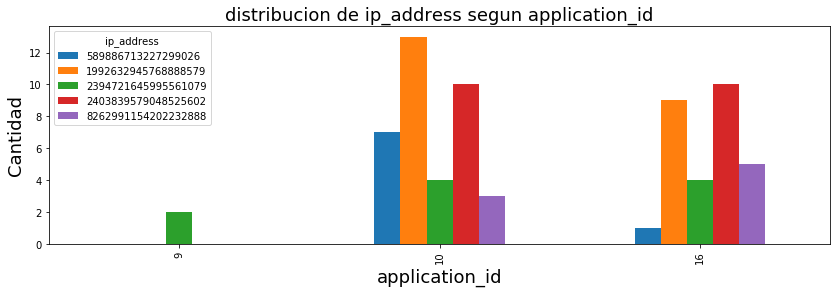

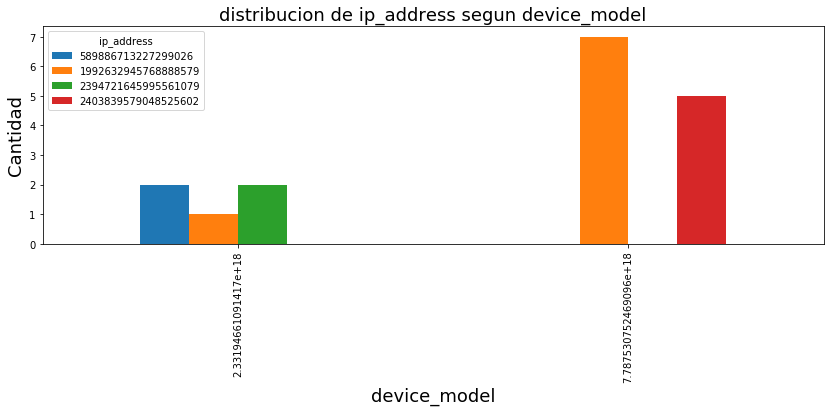

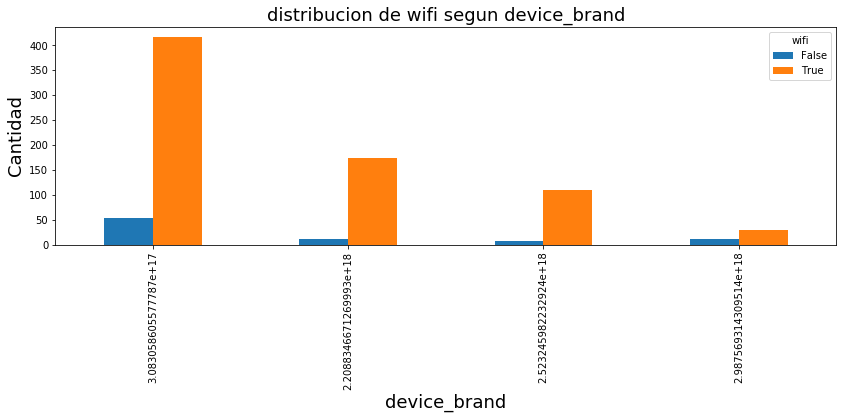

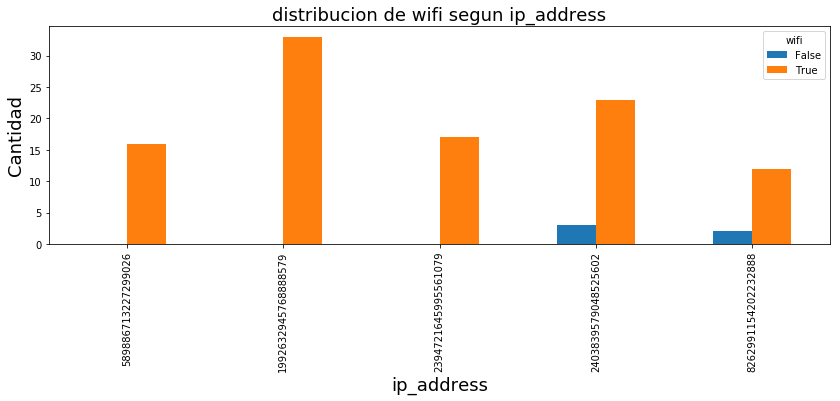

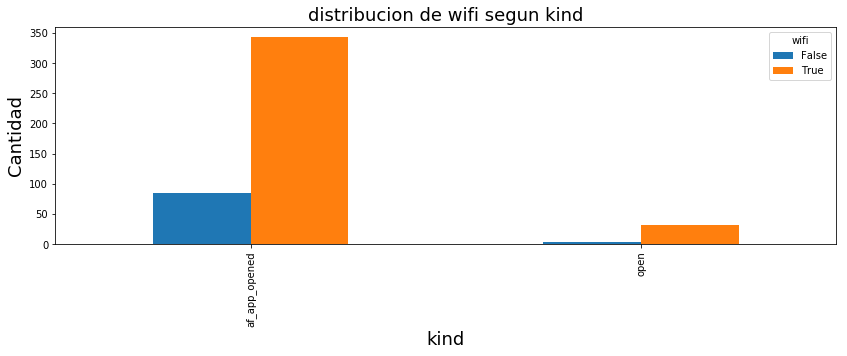

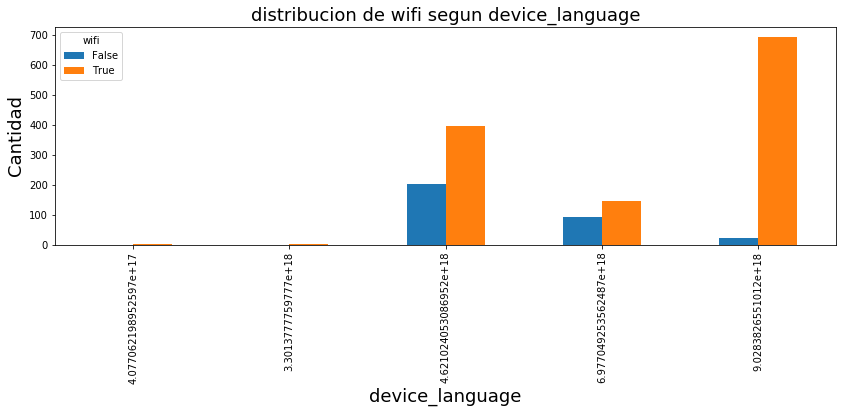

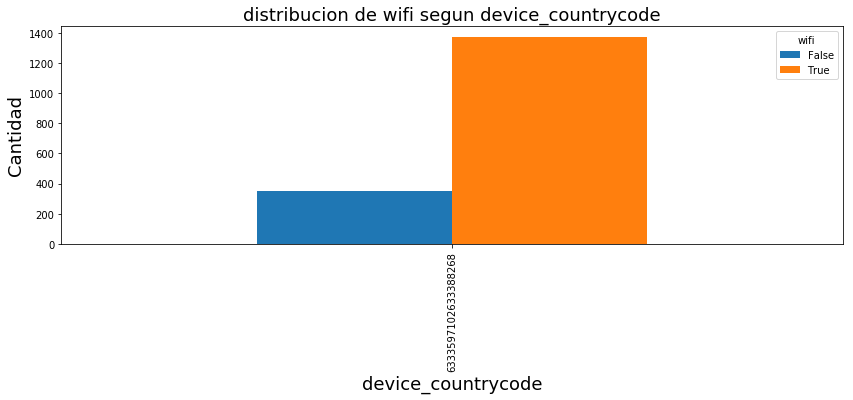

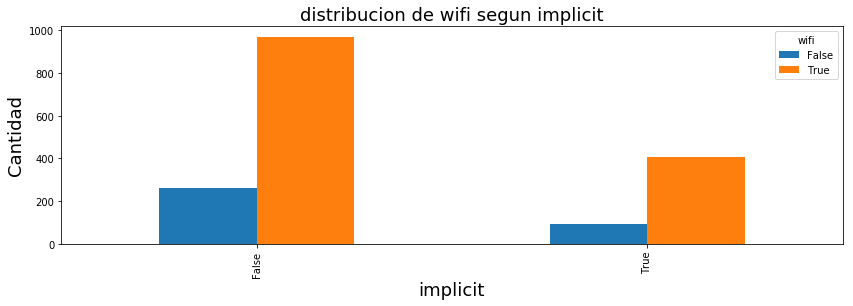

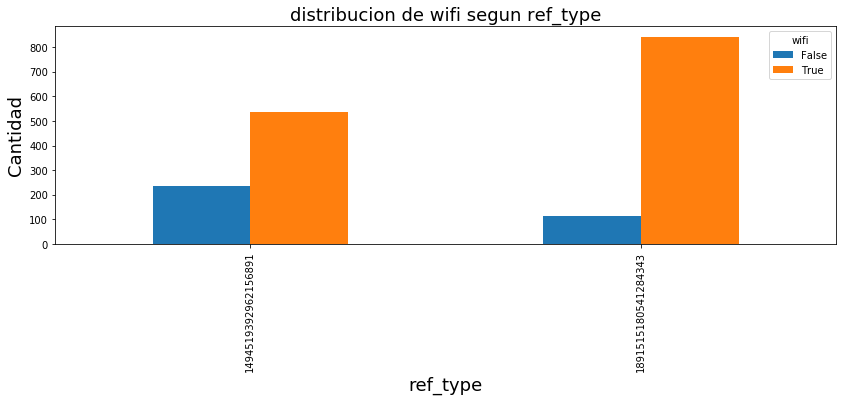

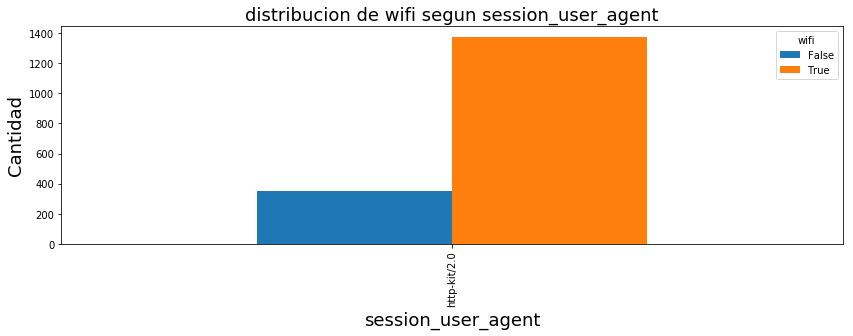

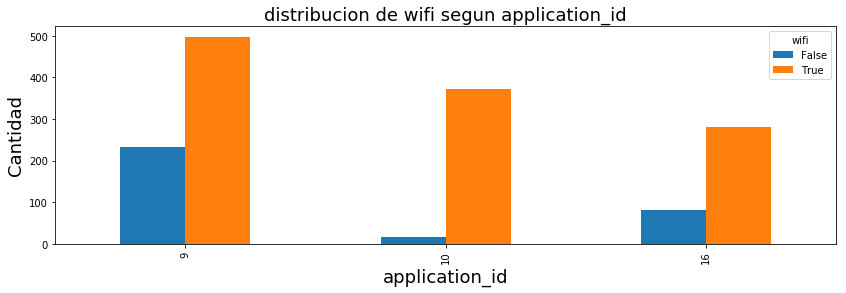

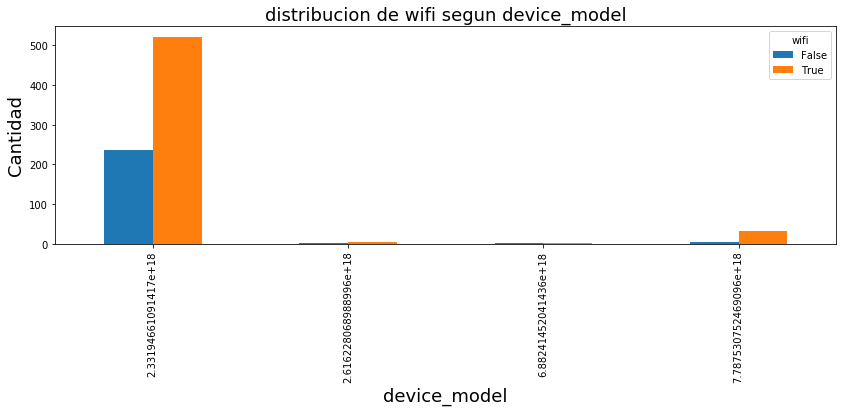

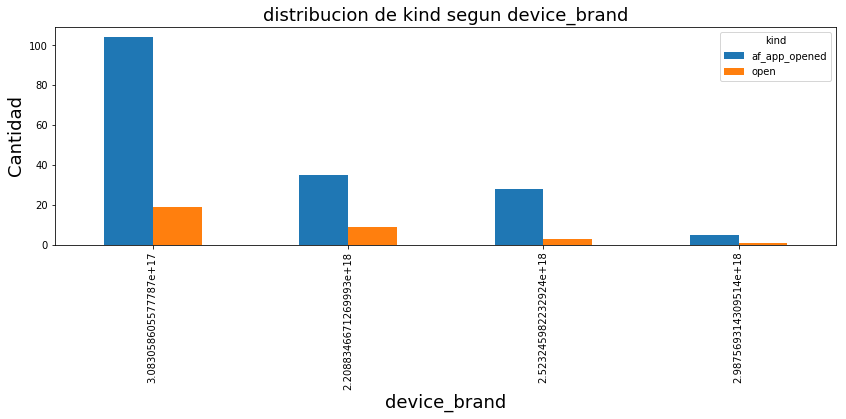

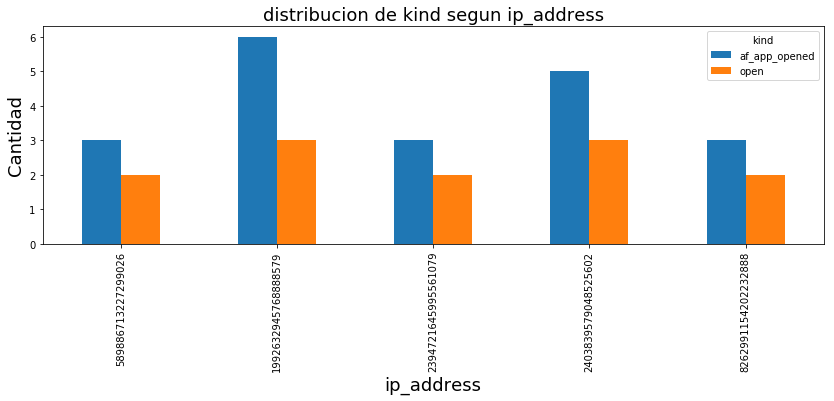

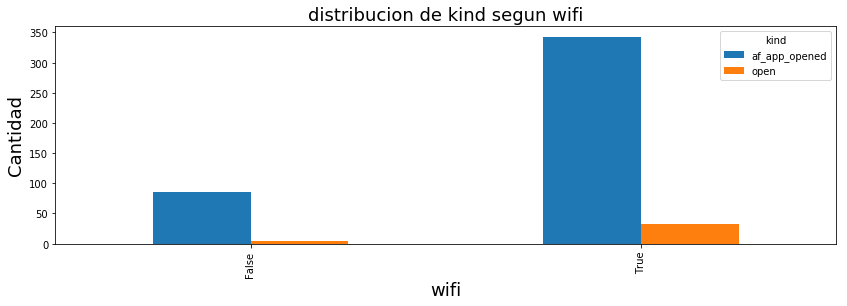

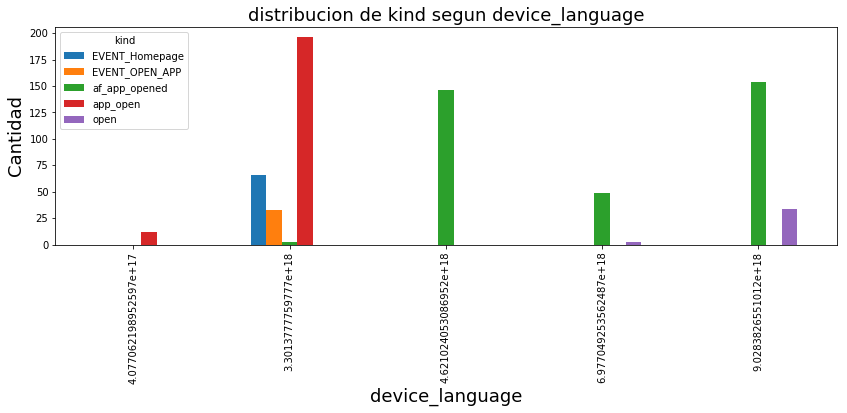

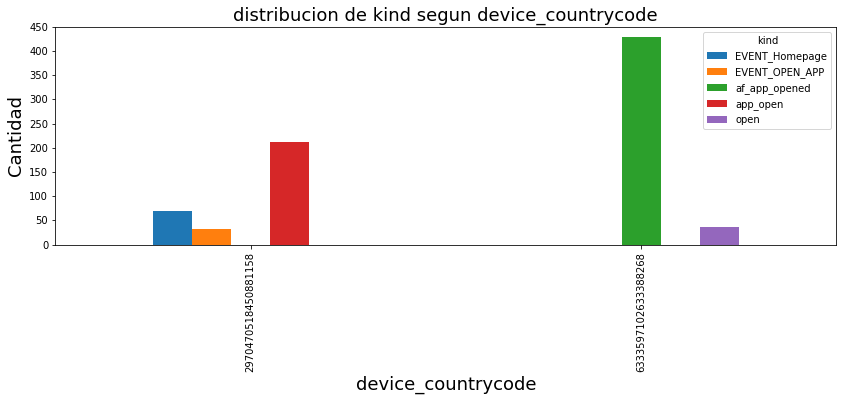

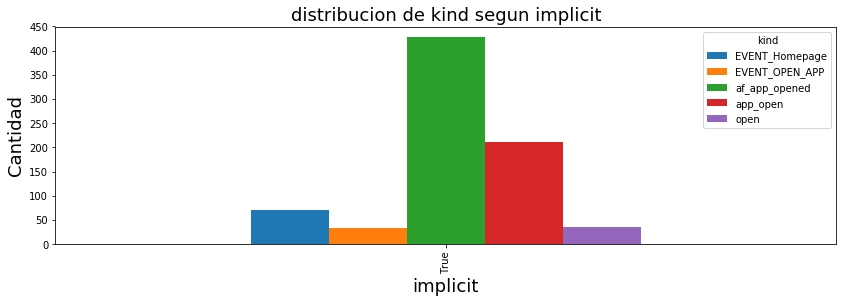

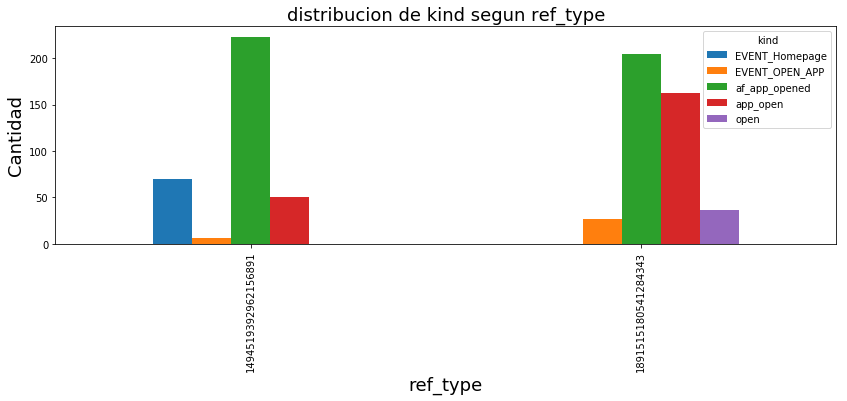

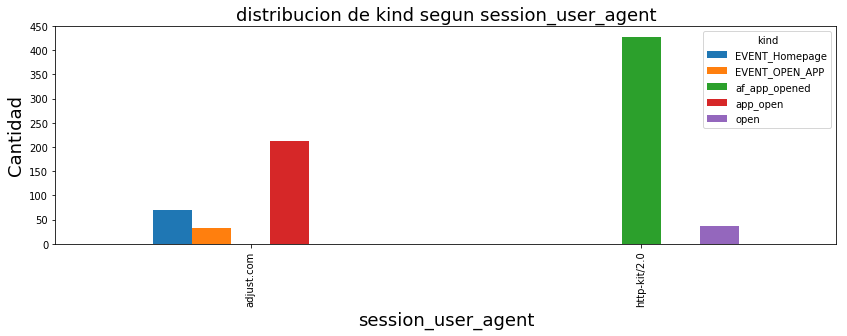

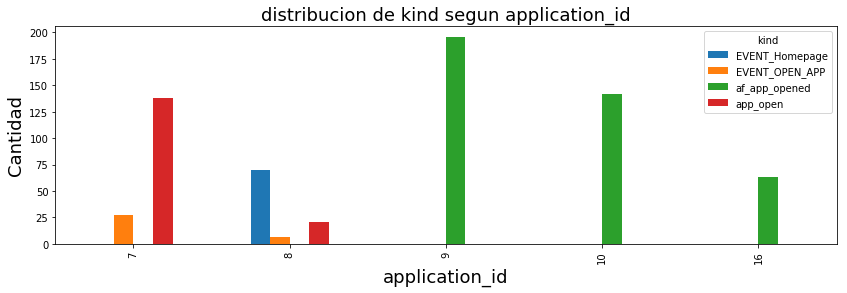

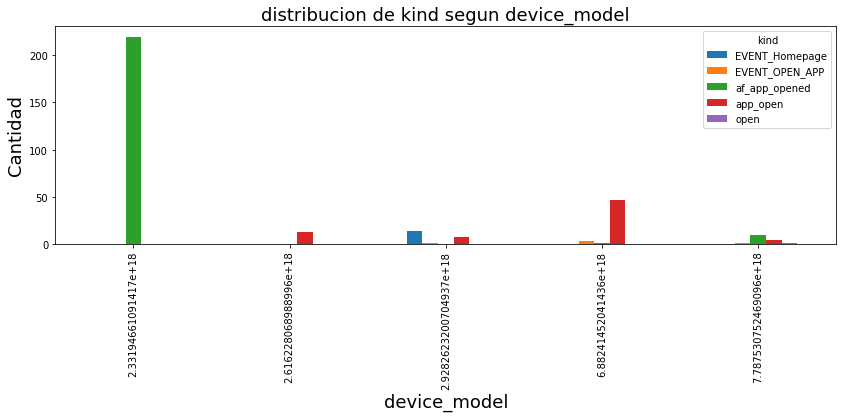

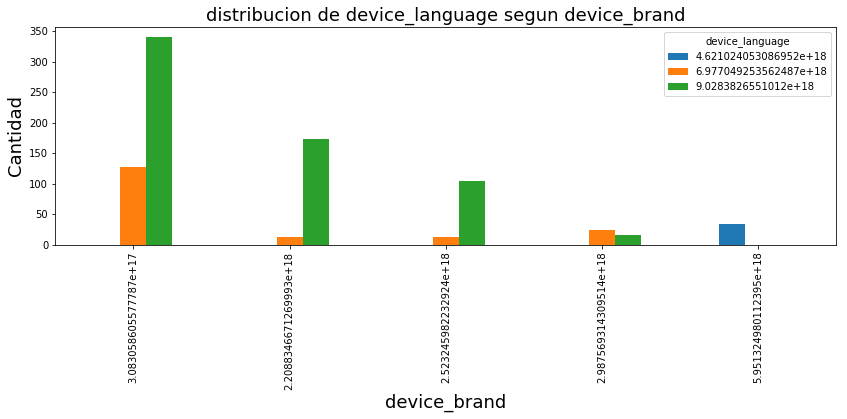

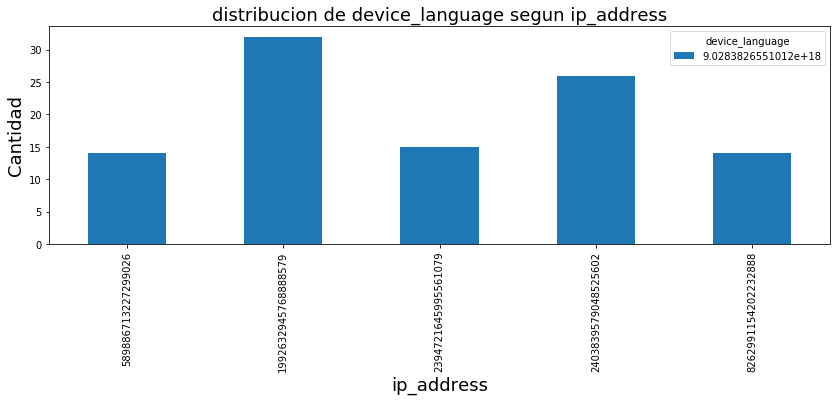

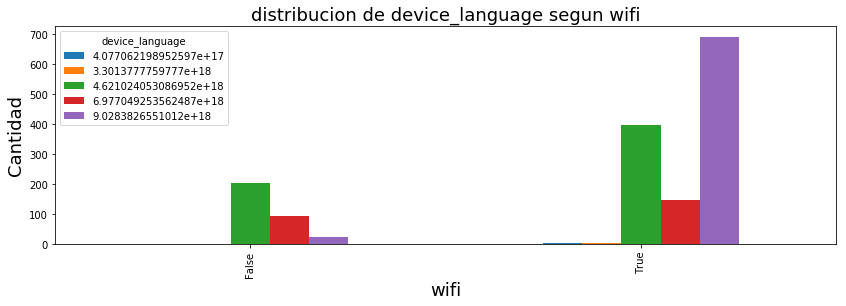

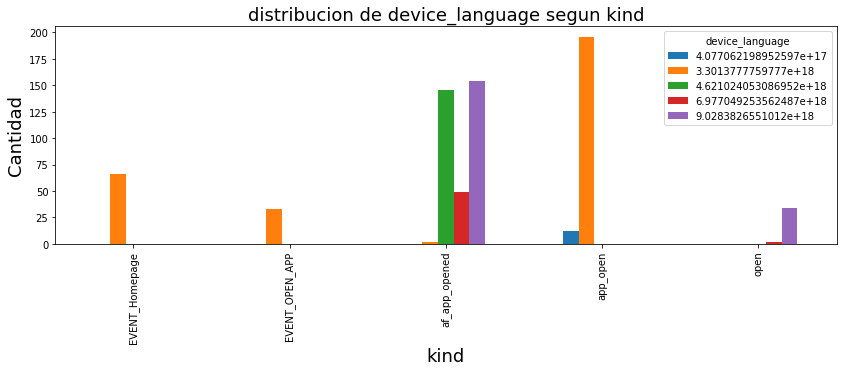

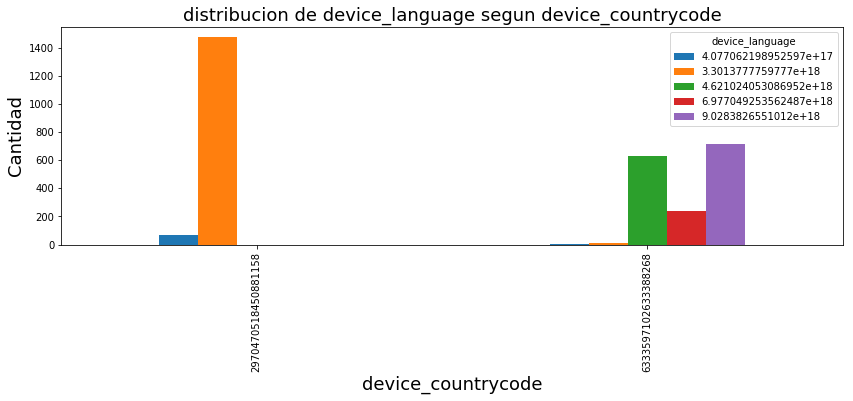

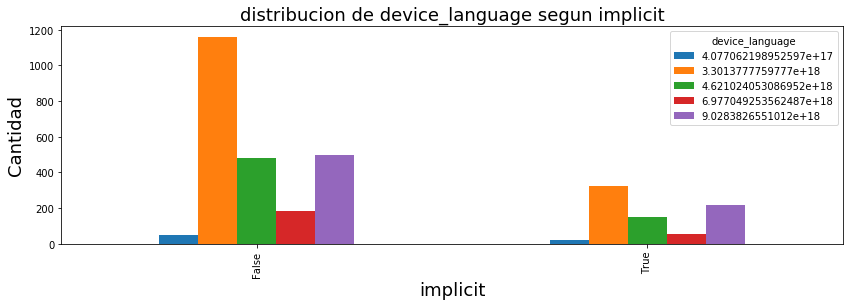

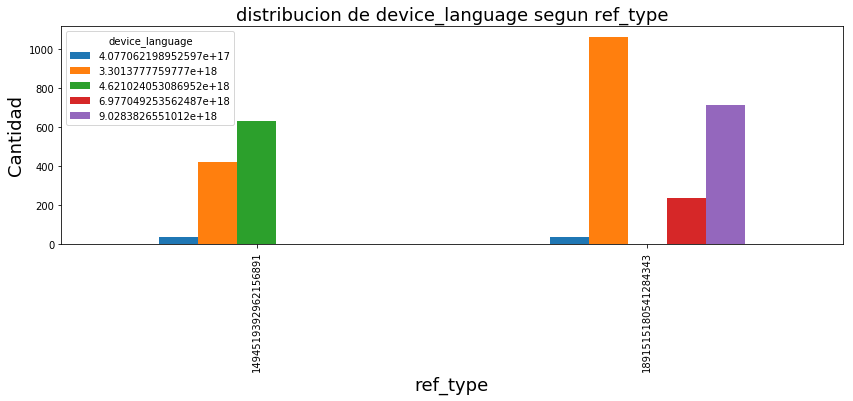

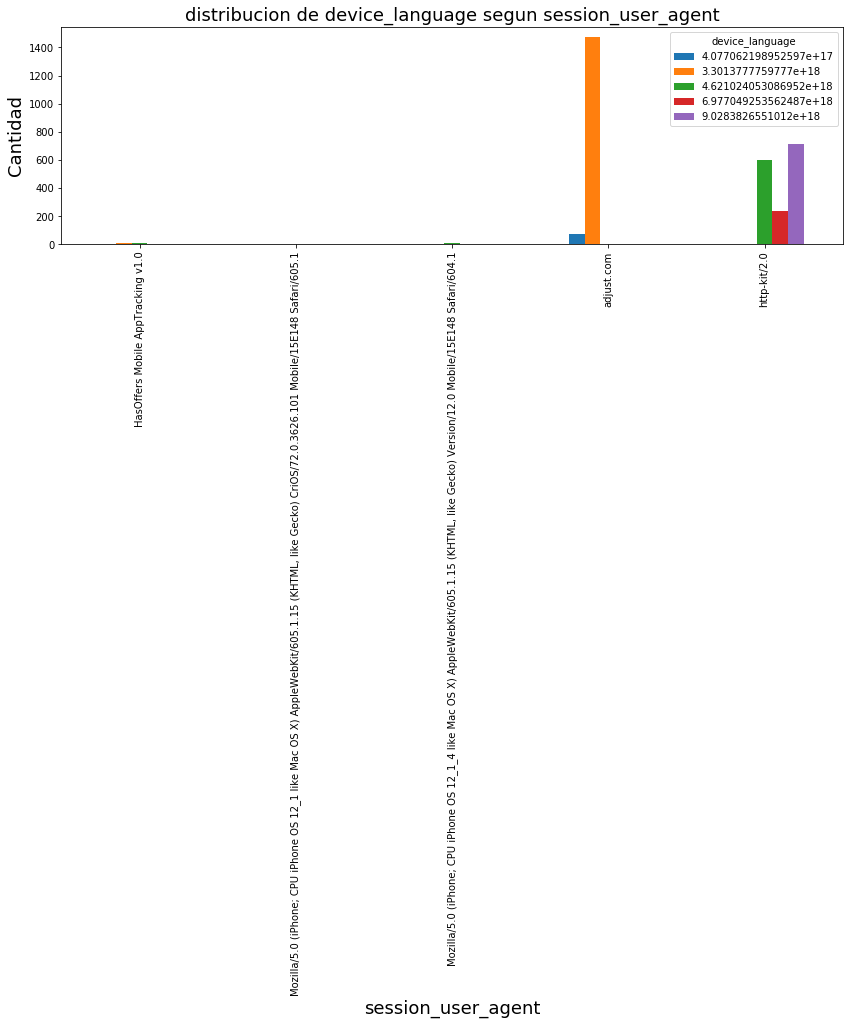

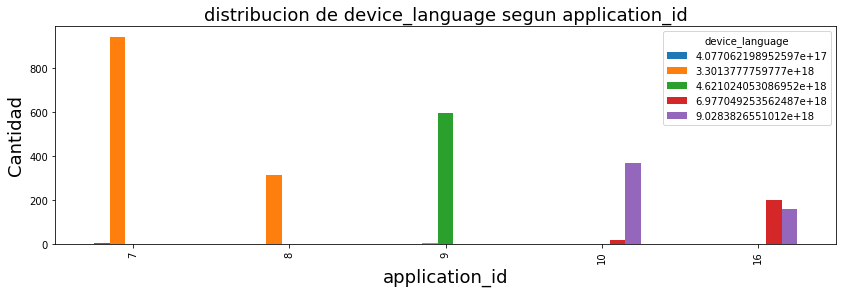

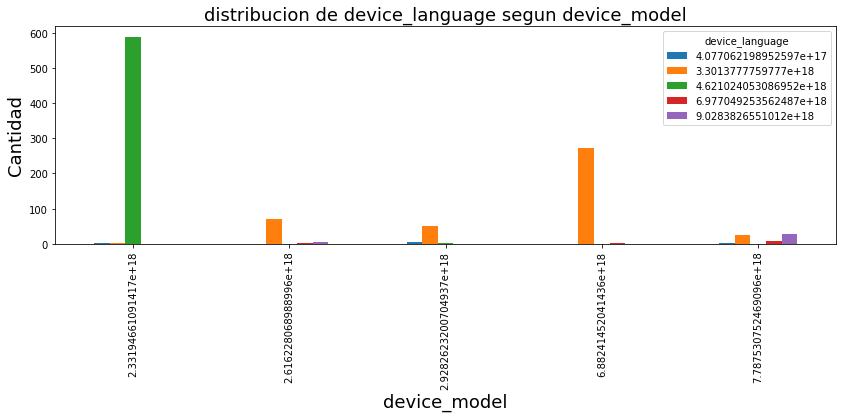

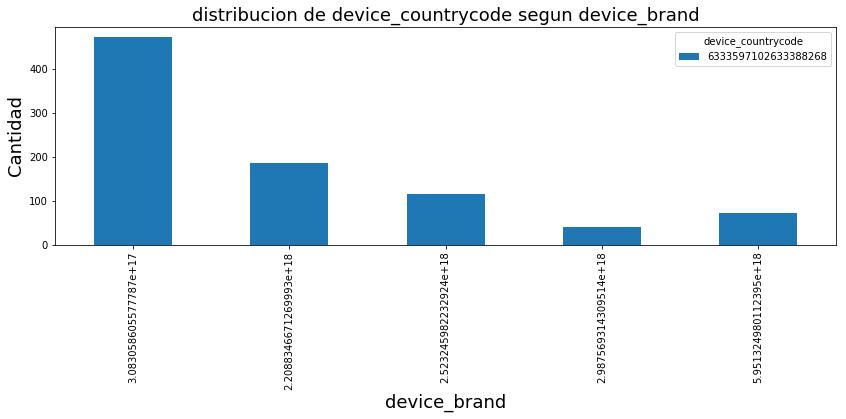

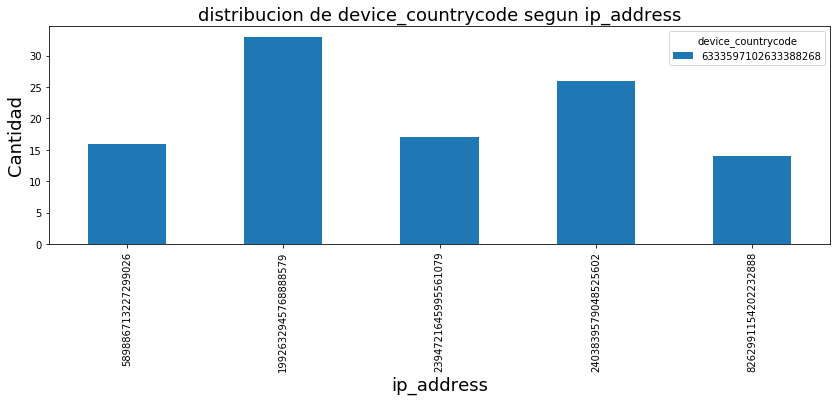

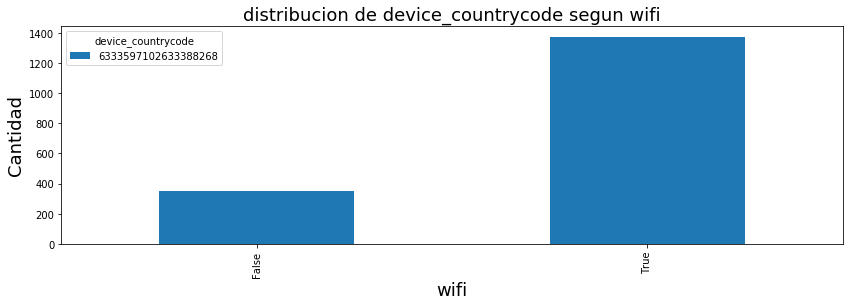

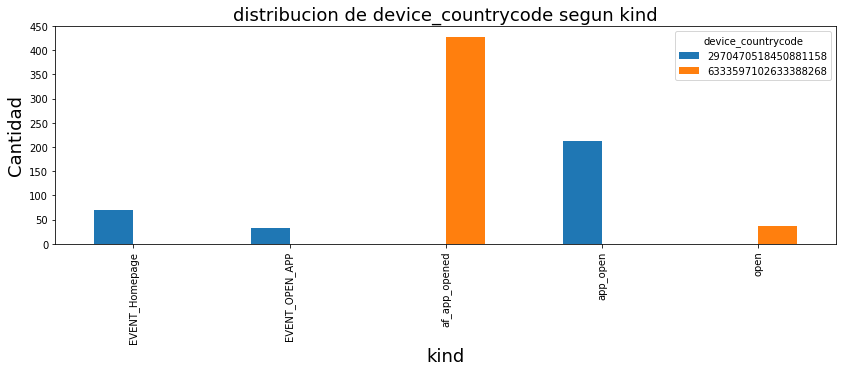

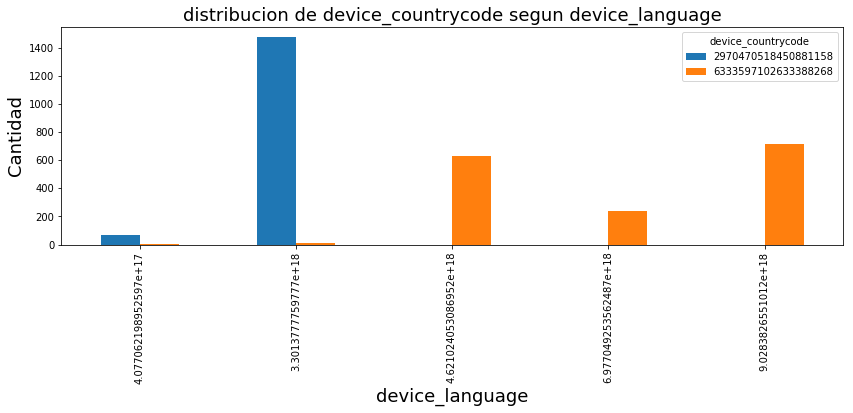

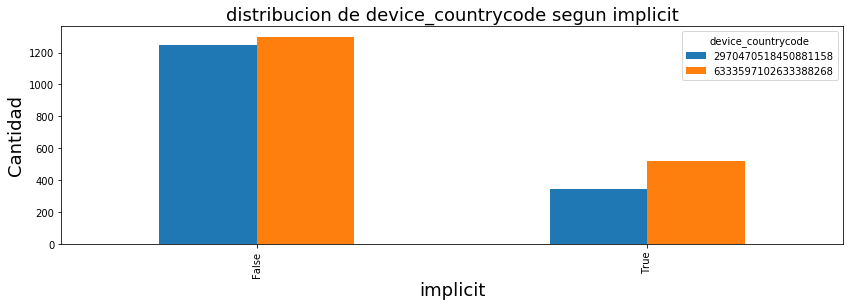

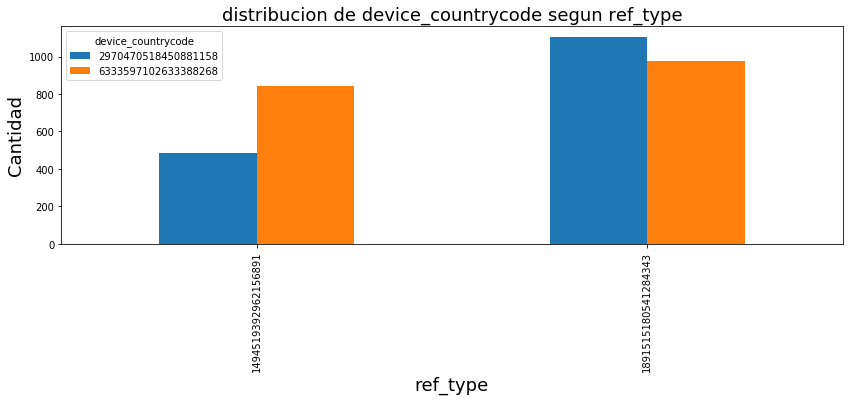

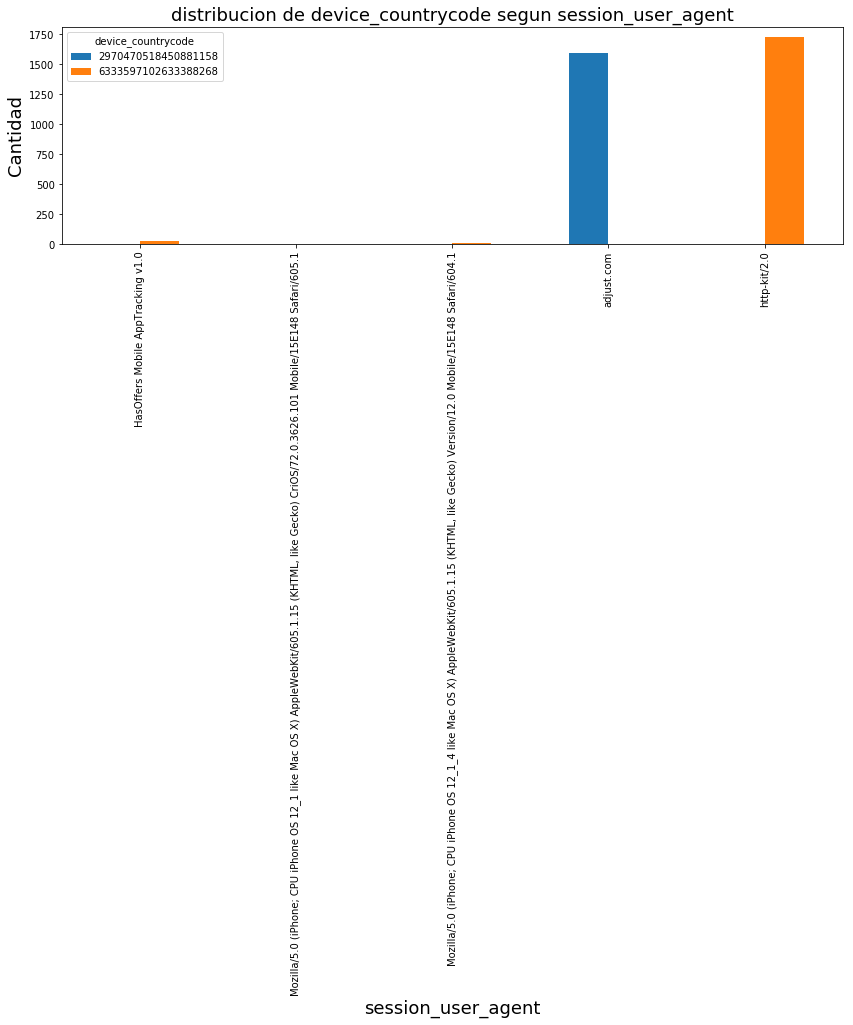

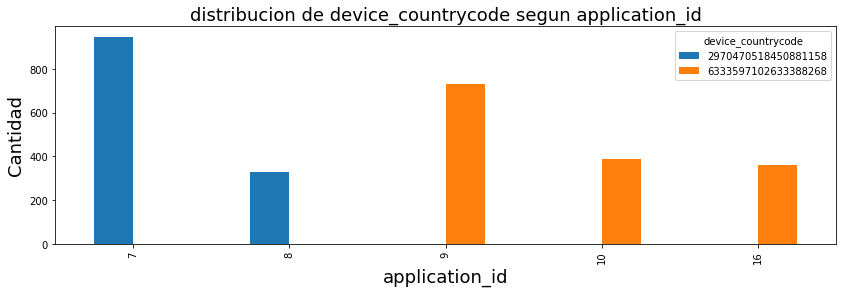

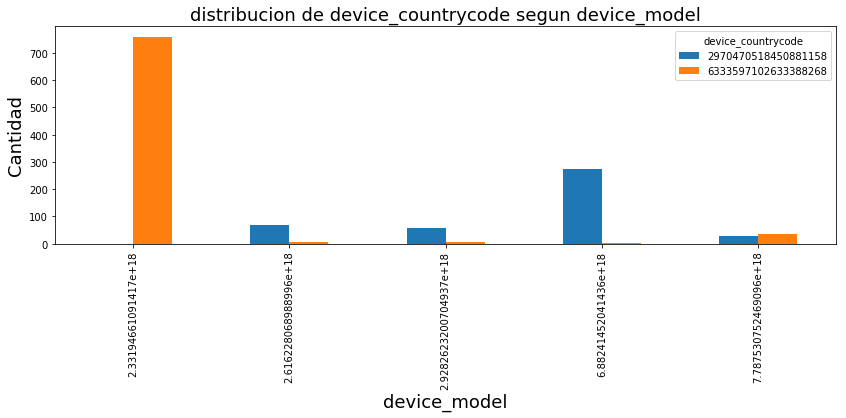

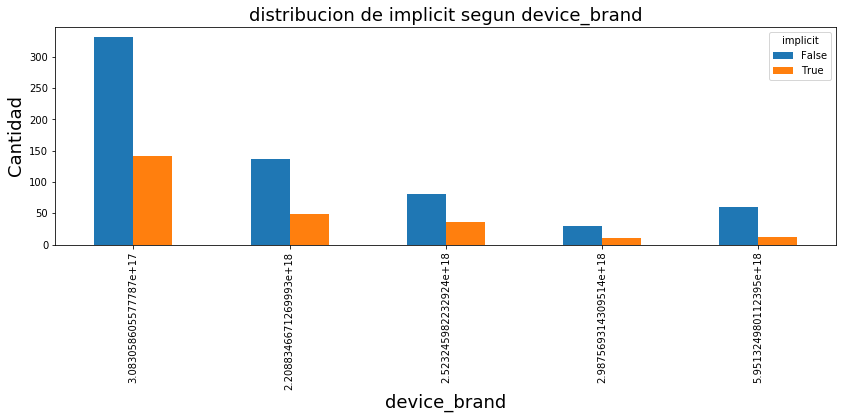

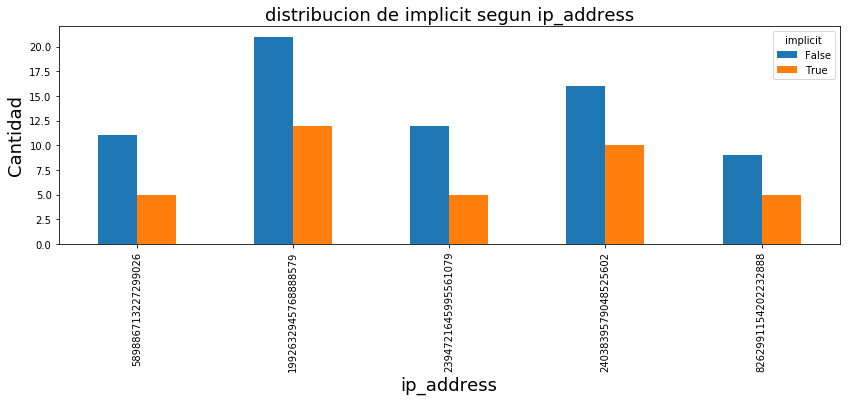

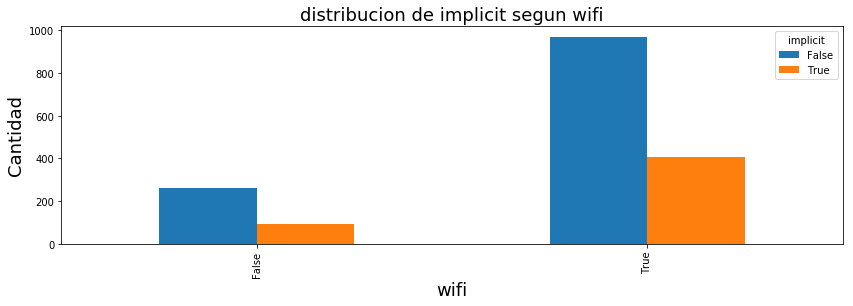

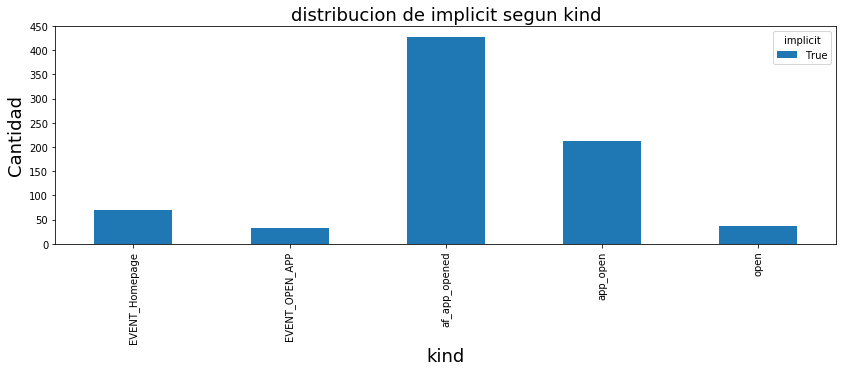

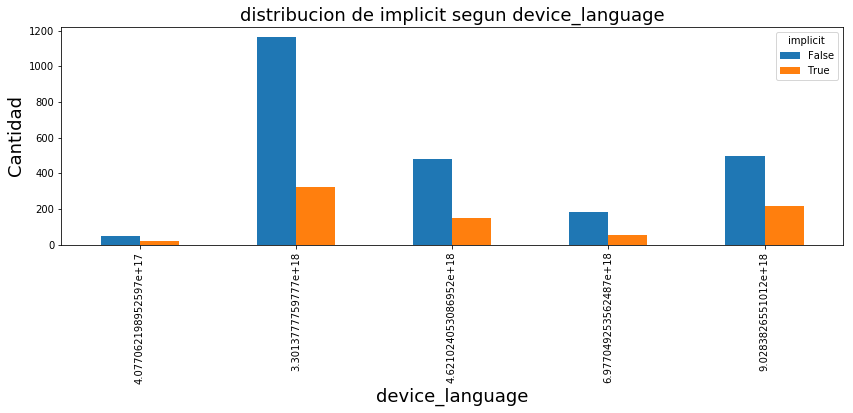

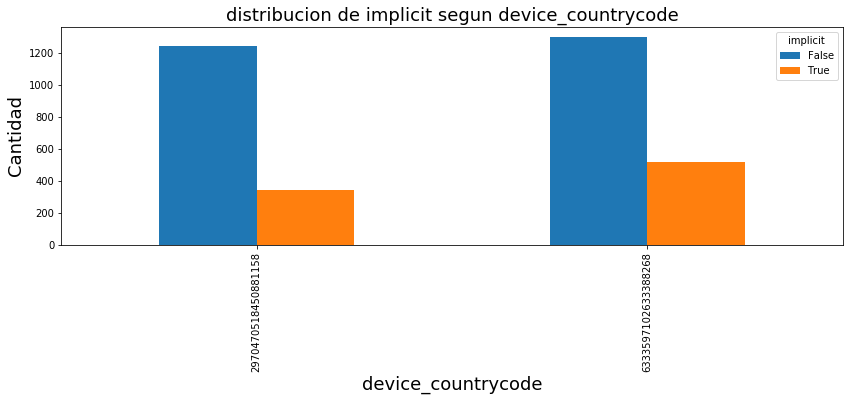

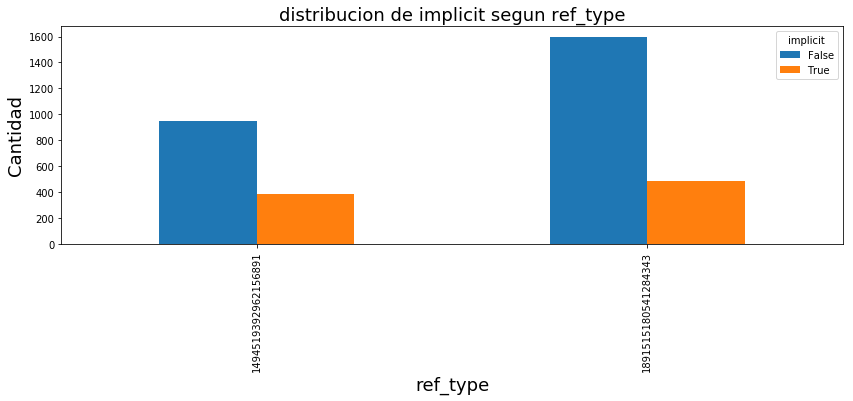

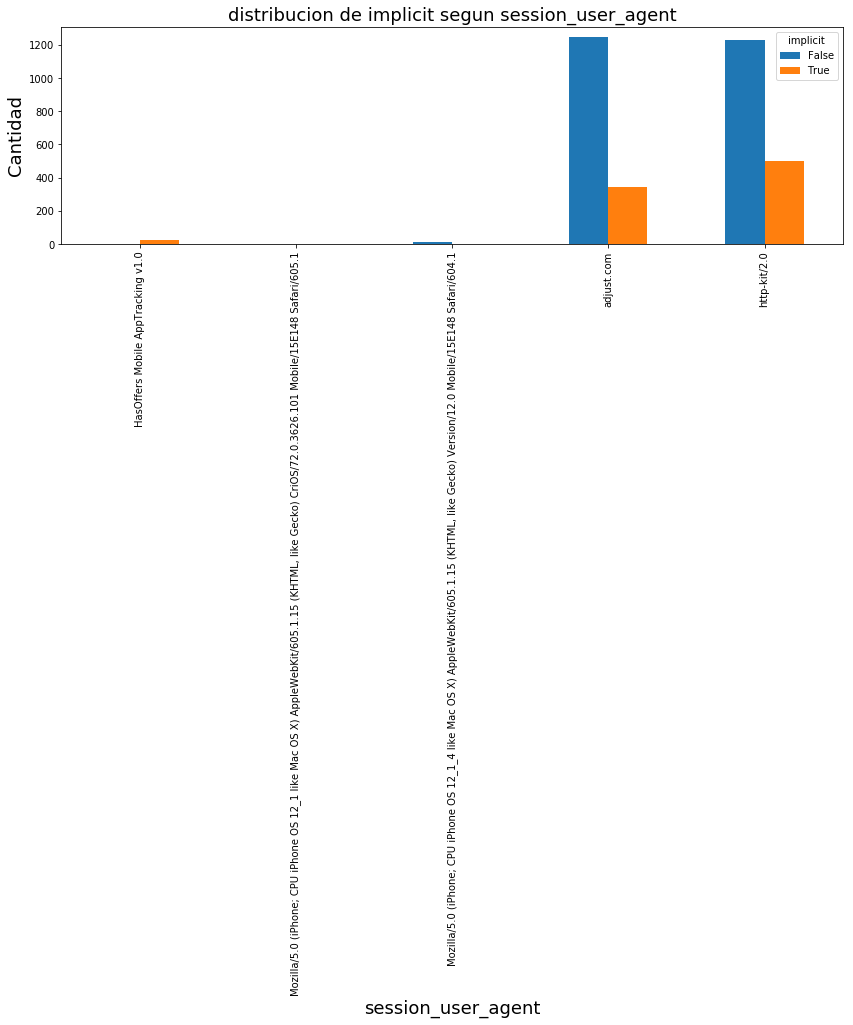

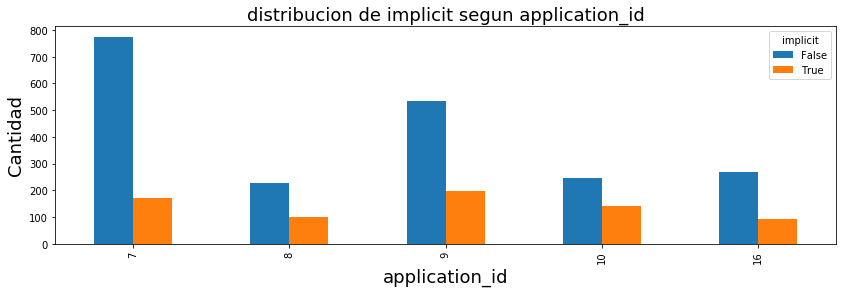

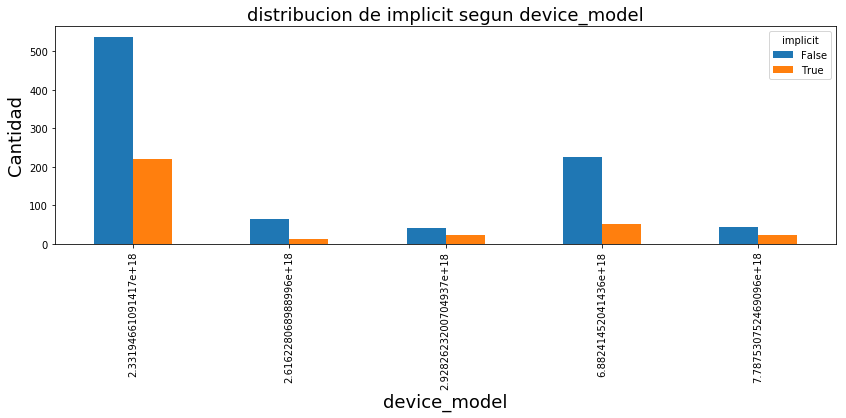

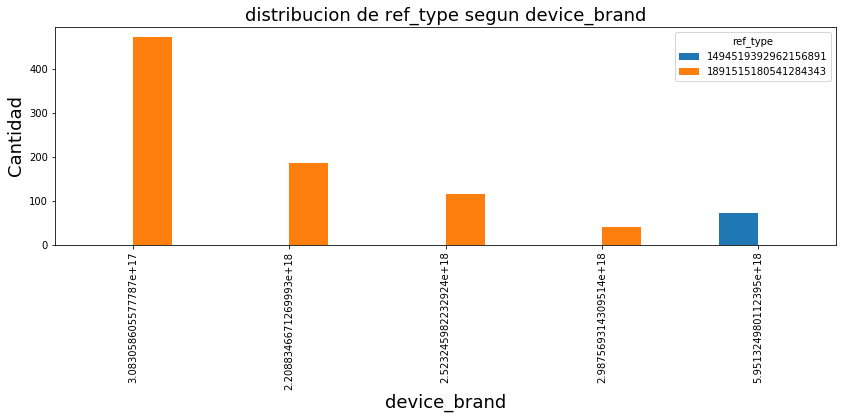

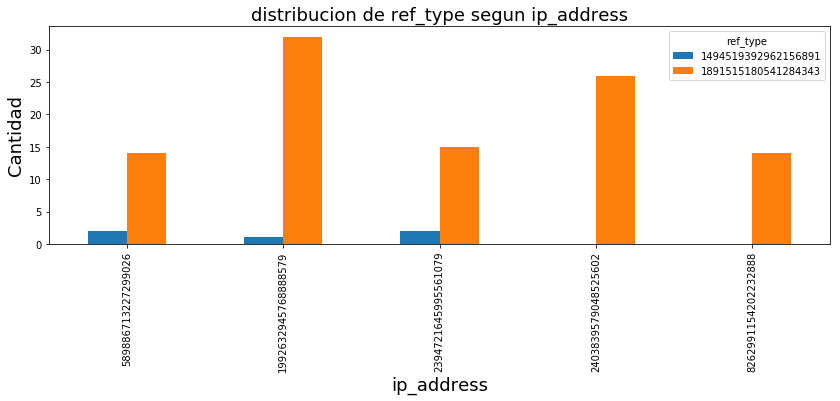

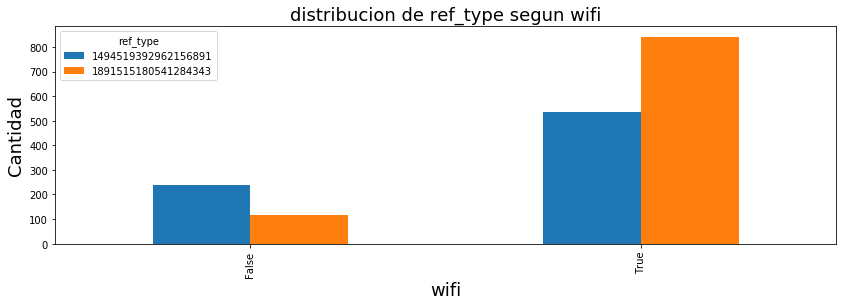

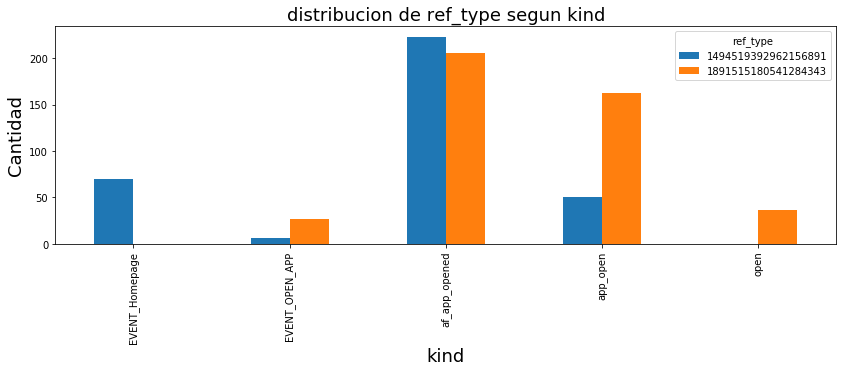

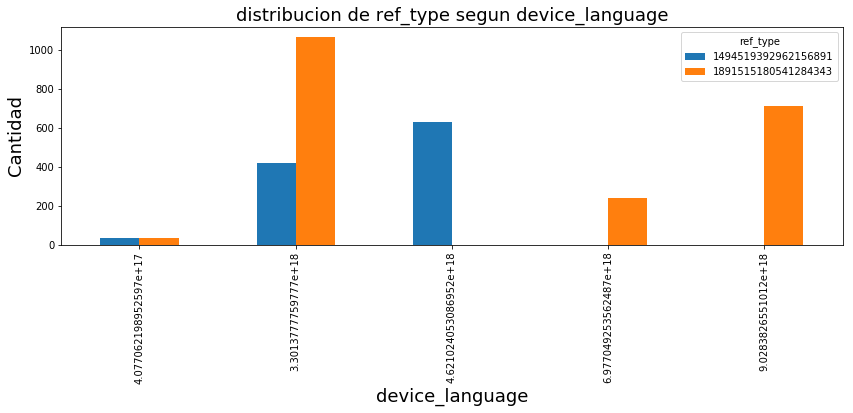

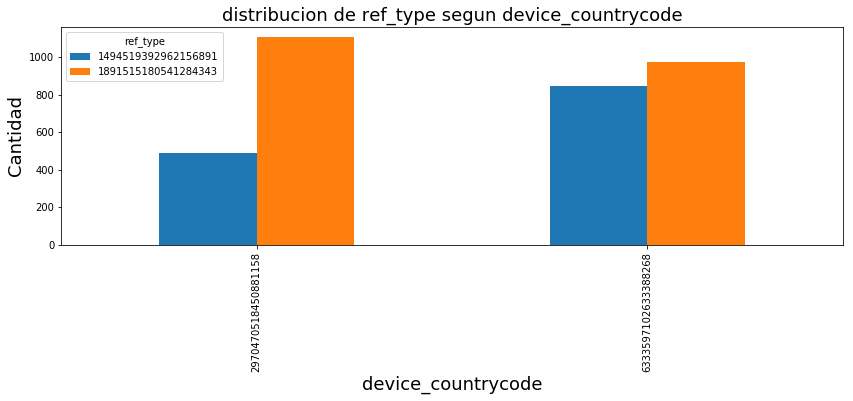

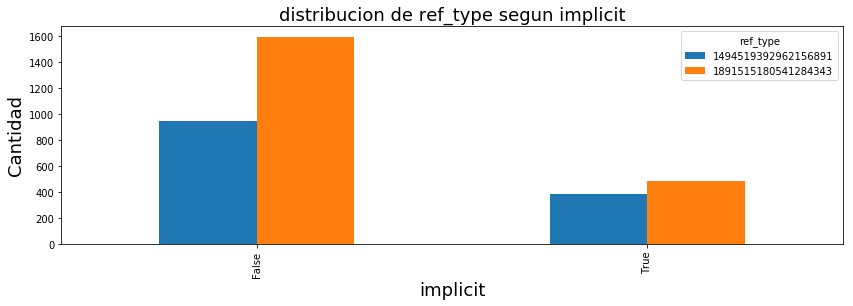

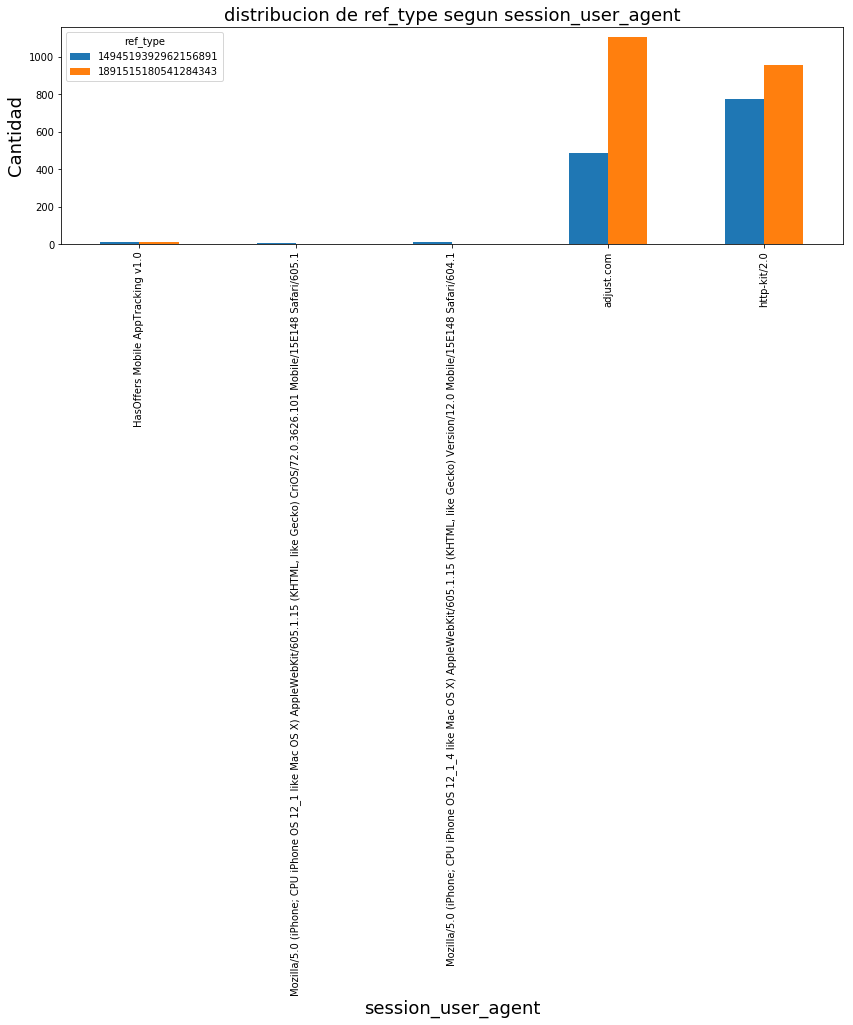

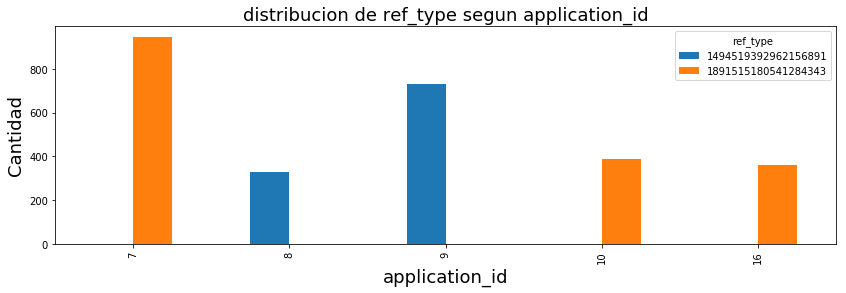

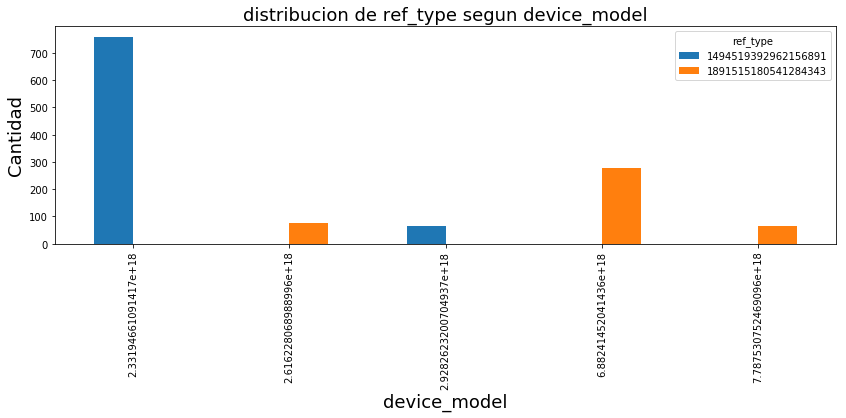

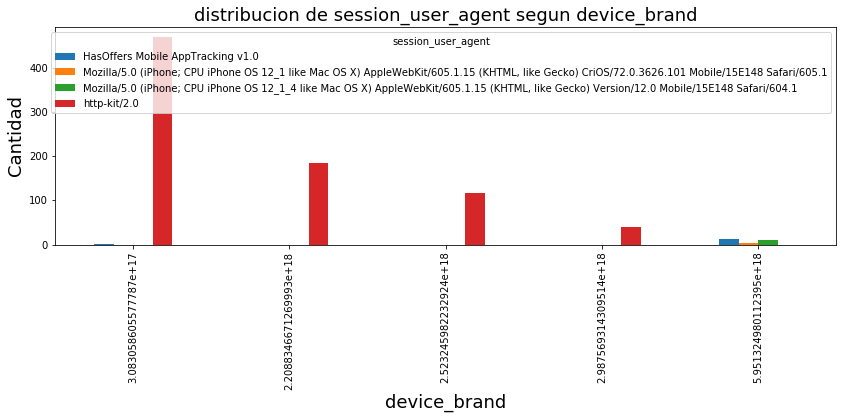

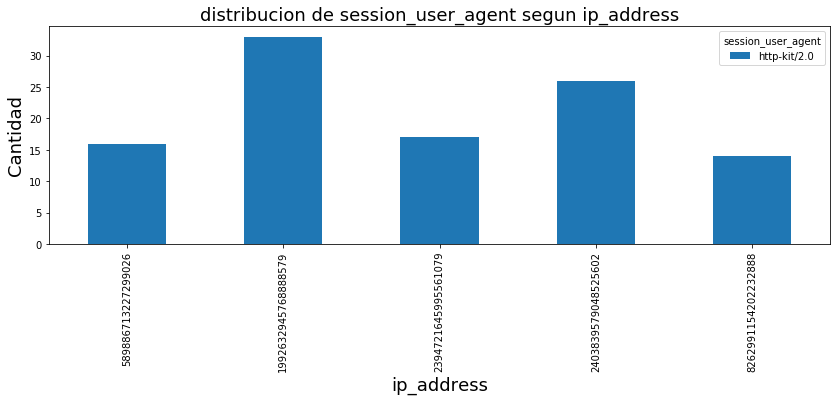

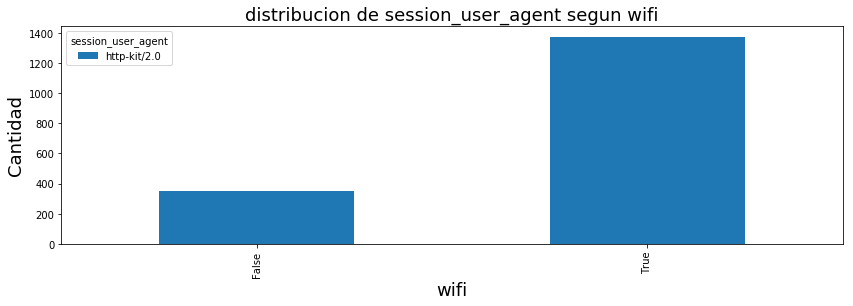

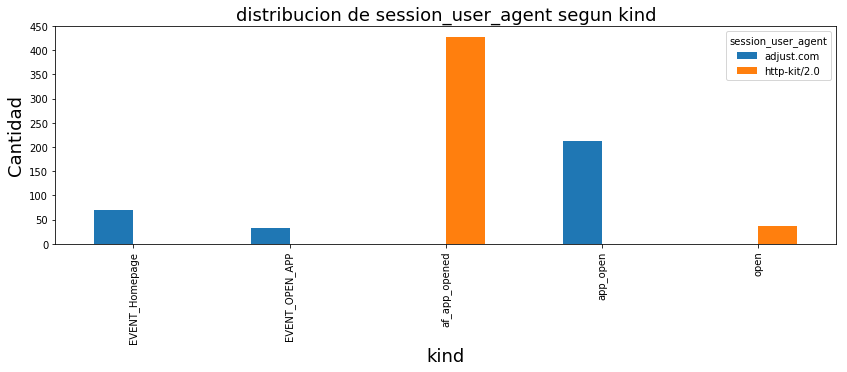

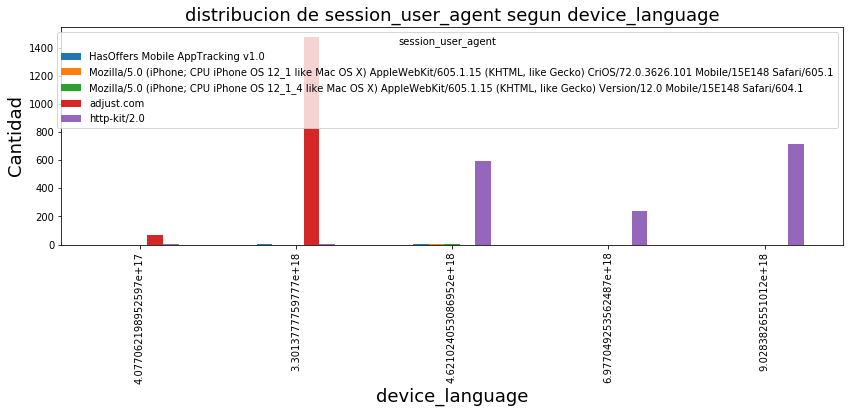

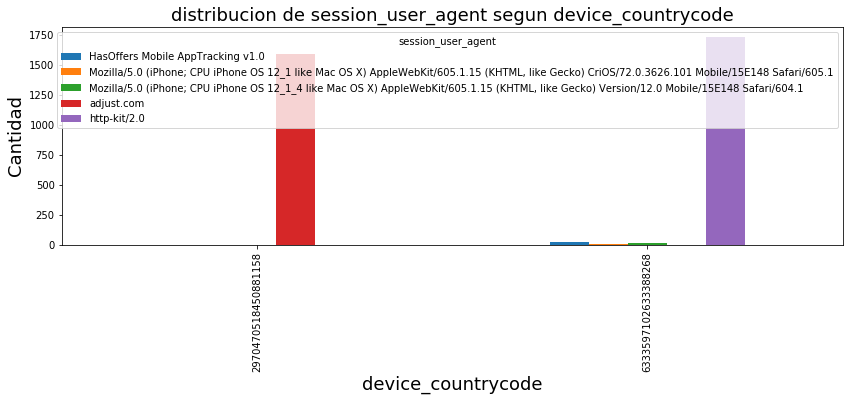

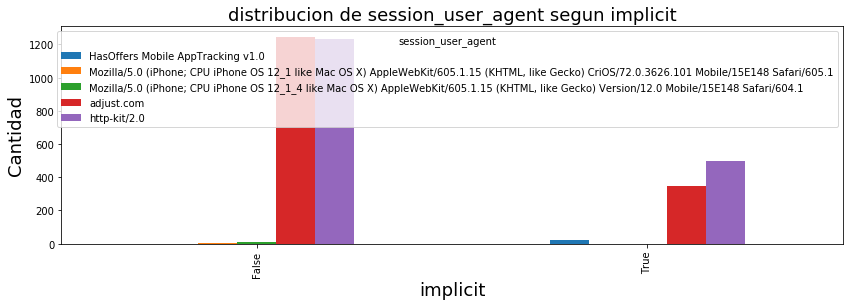

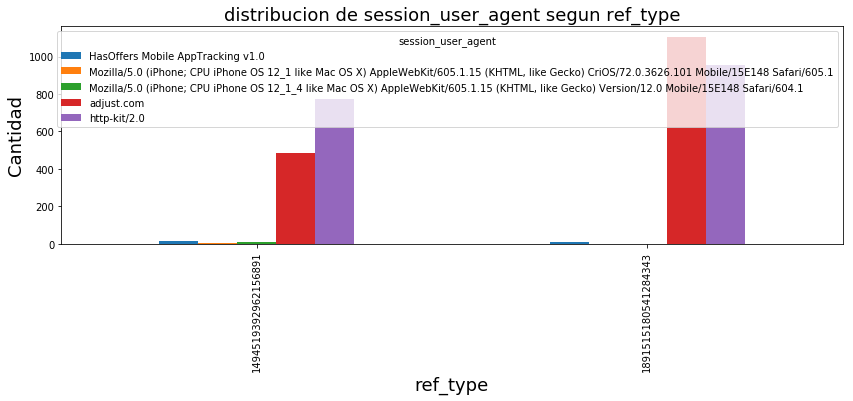

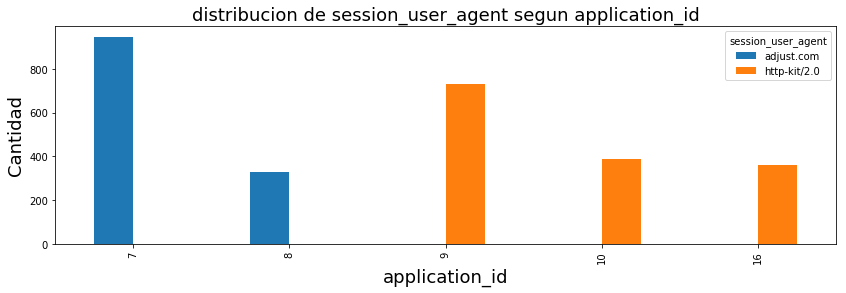

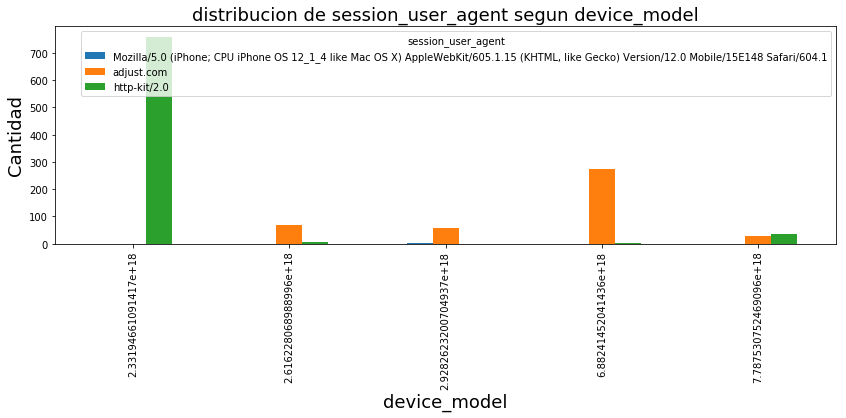

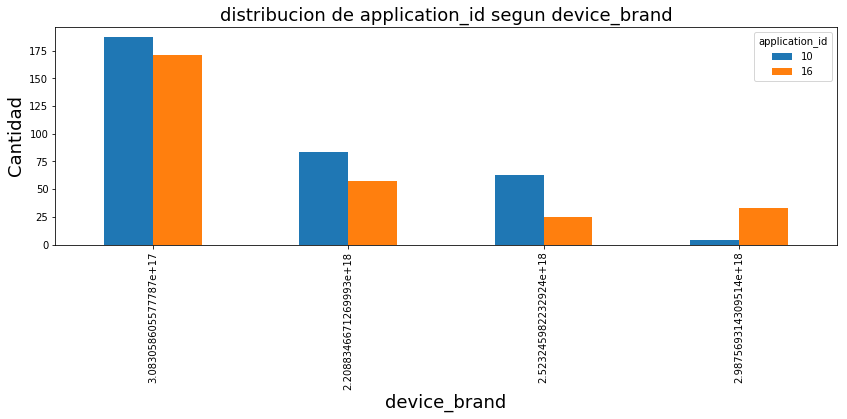

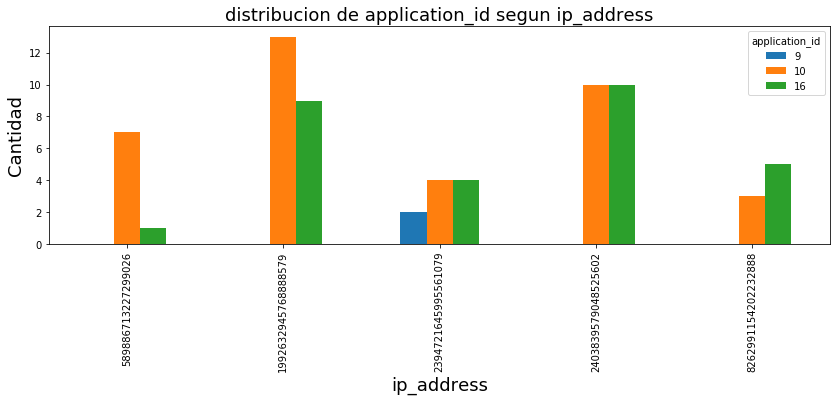

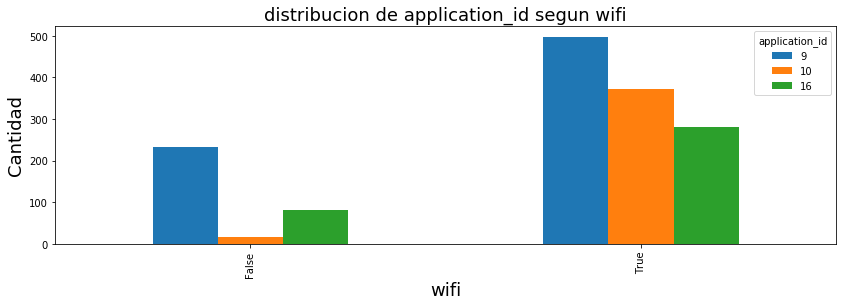

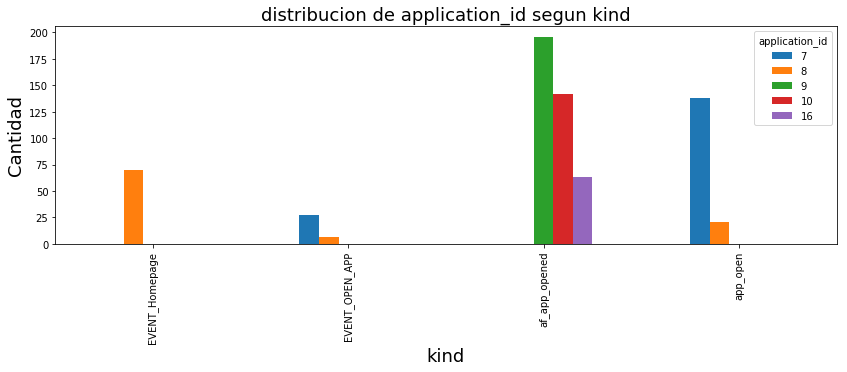

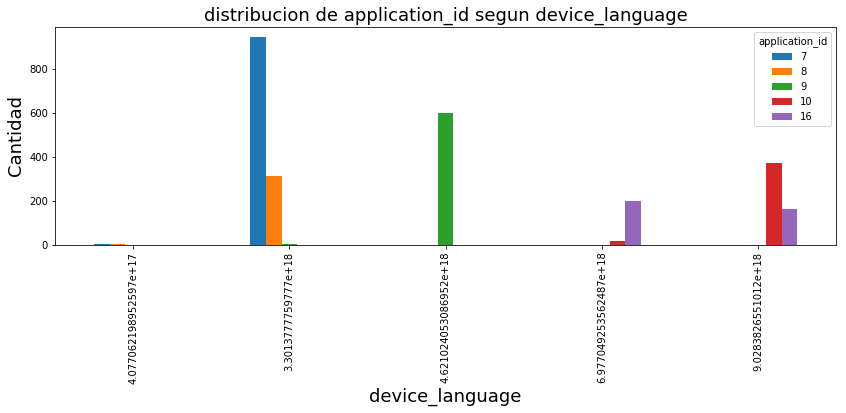

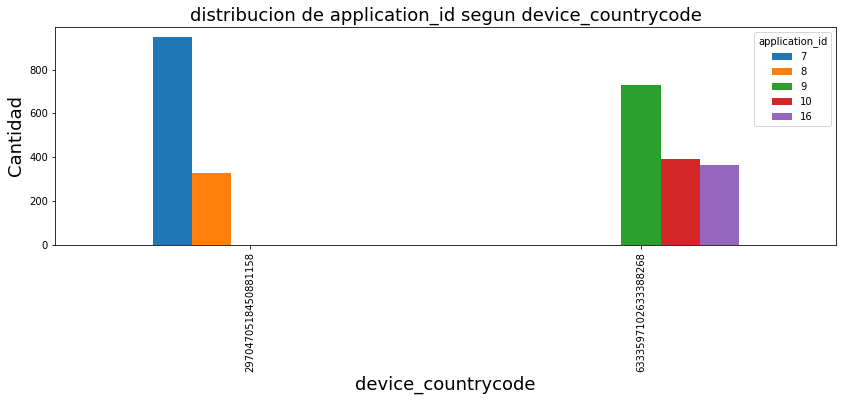

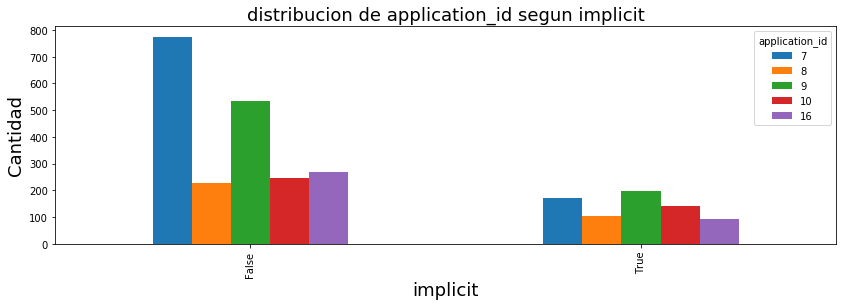

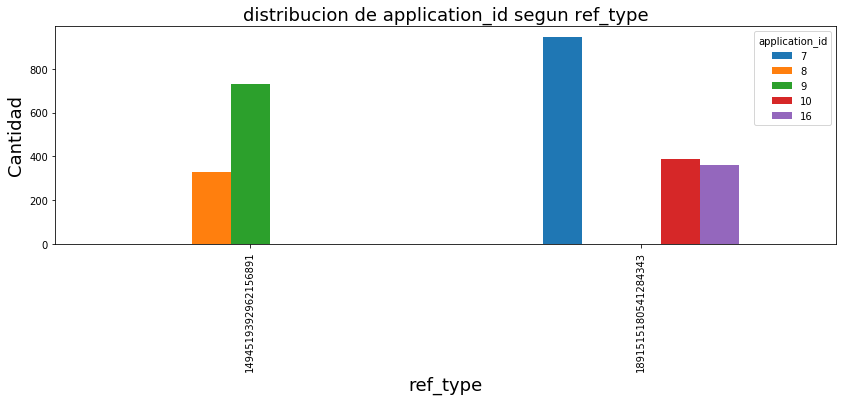

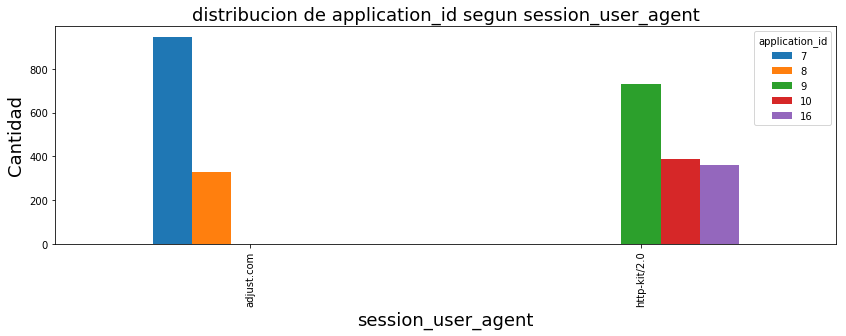

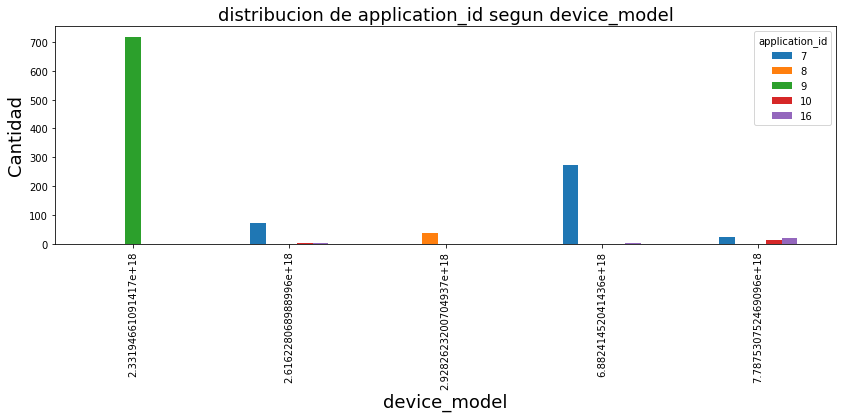

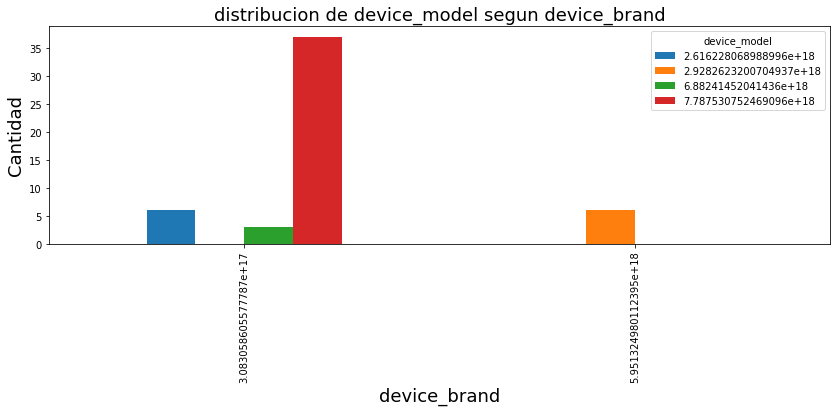

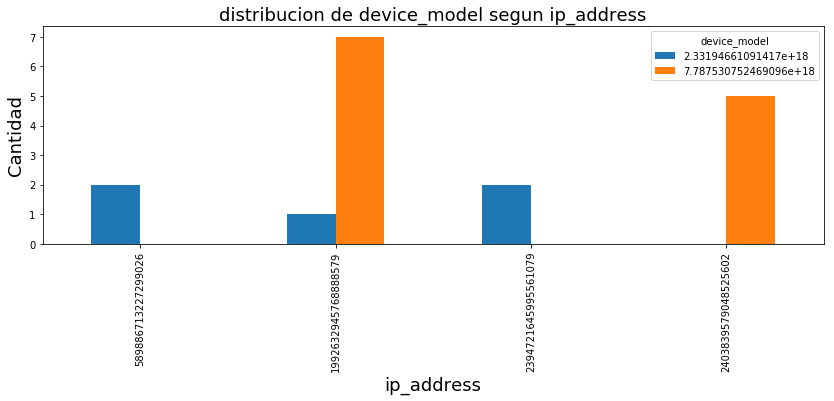

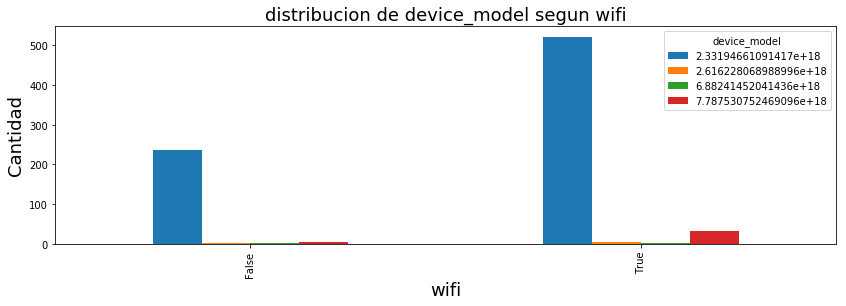

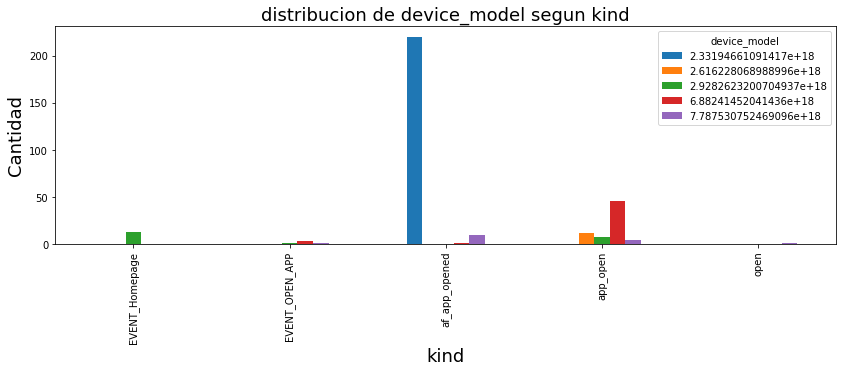

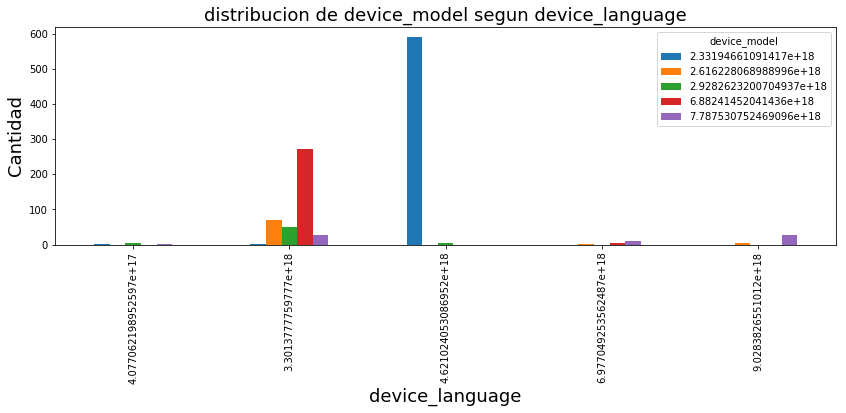

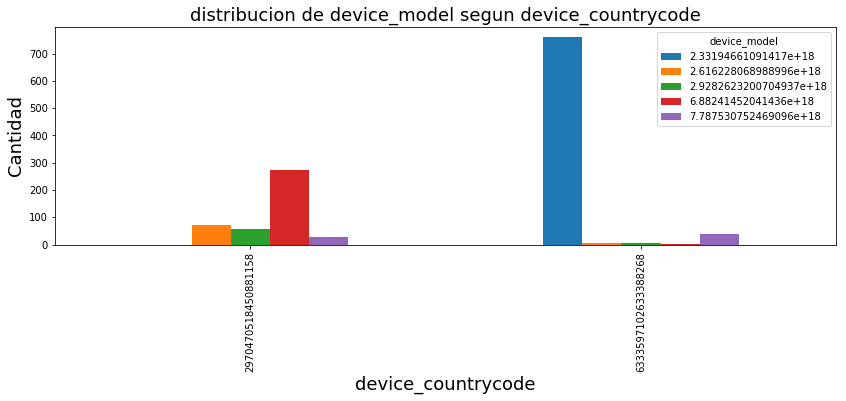

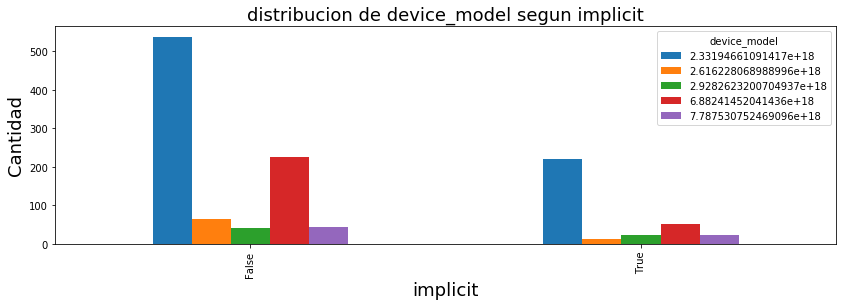

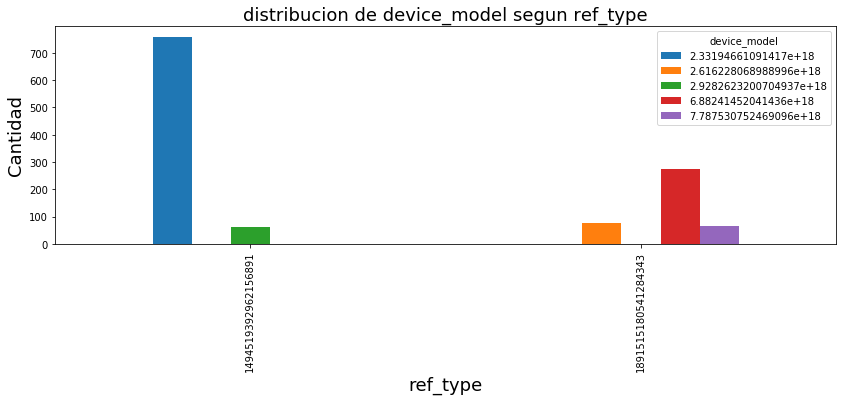

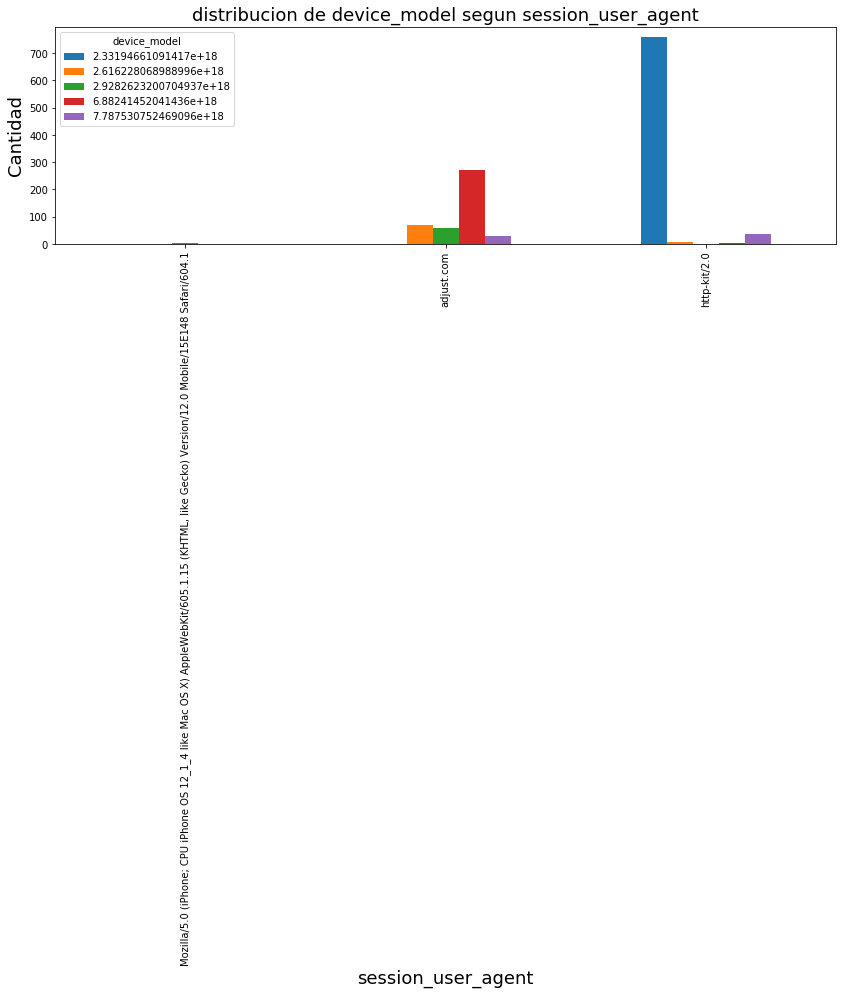

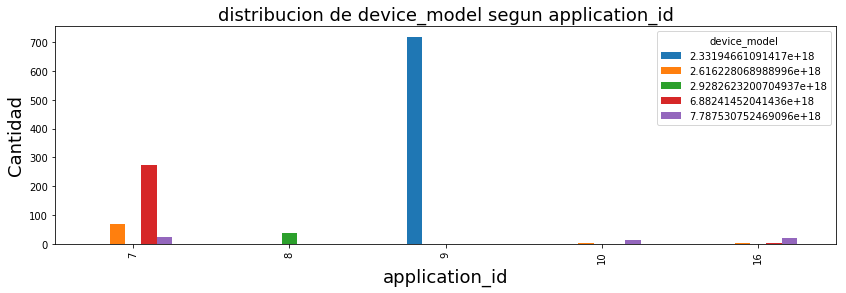

In [9]:
def barplot_doble(i, j):
    installs_filtrado = installs.loc[installs[i].isin(top5[i])].loc[installs[j].isin(top5[j])]
    if installs_filtrado[i].empty or installs_filtrado[j].empty:
        print('no pude hacer barplot de ' + j + ' segun ' + i)
        return
    plot = pd.crosstab(installs_filtrado[j], installs_filtrado[i]).plot(kind='bar',figsize=(14,4));
    plot.set_title('distribucion de ' + i + ' segun ' + j, fontsize=18)
    plot.set_xlabel(j,fontsize=18)
    plot.set_ylabel('Cantidad', fontsize=18)
    plt.savefig('installs/top5'+str(j)+'_segun_top5'+str(i)+'.png', bbox_inches = 'tight')

for i in top5.keys():
    for j in top5.keys():
        if i != j:
            barplot_doble(i, j)

## Buscamos la distribucion de cada columna a lo largo de cada fecha

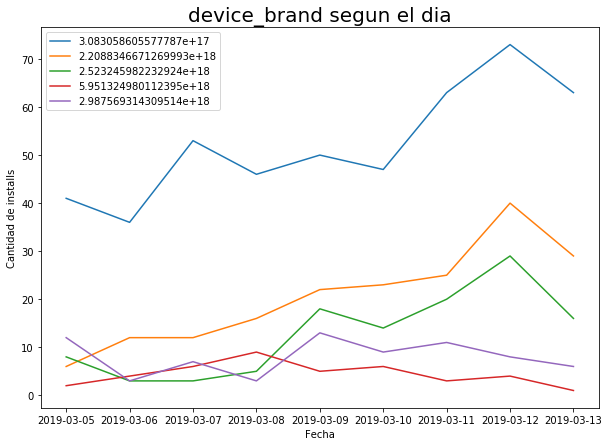

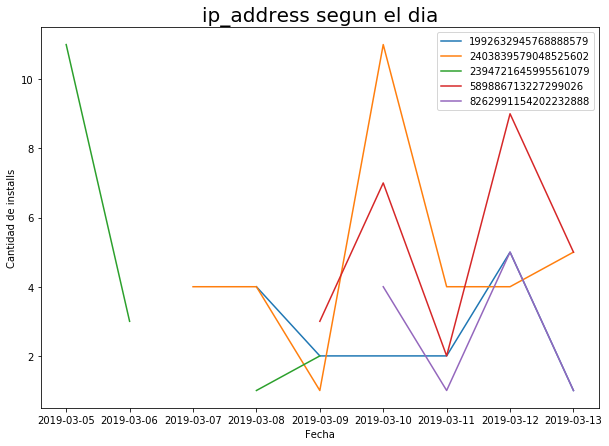

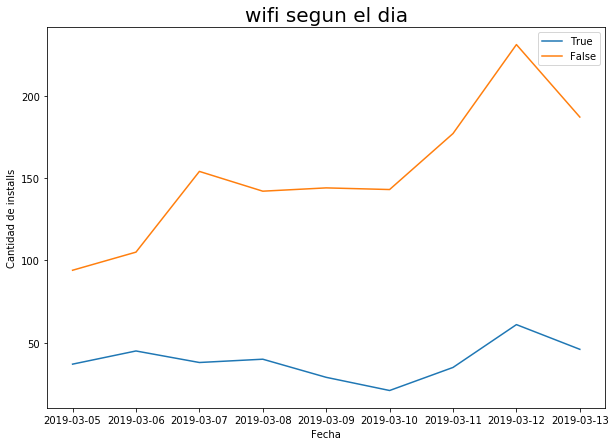

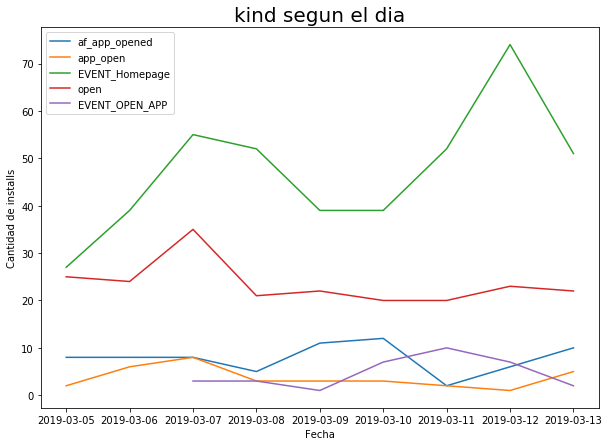

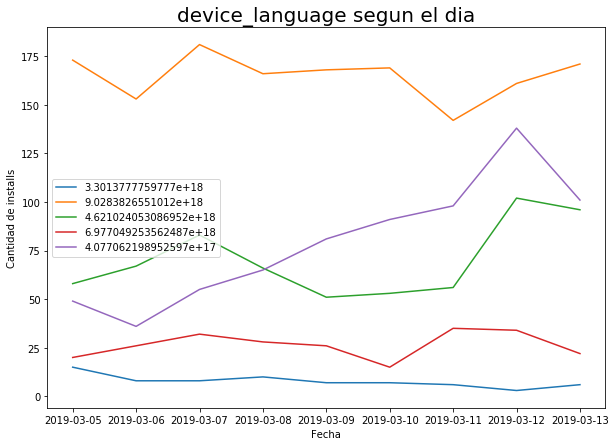

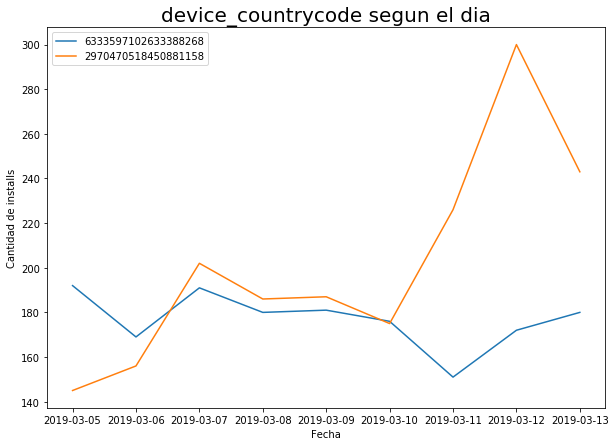

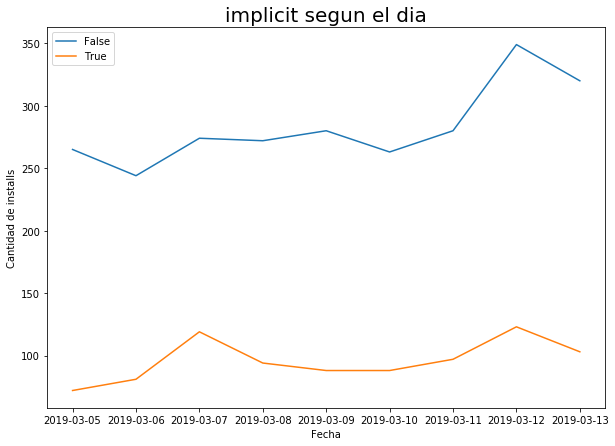

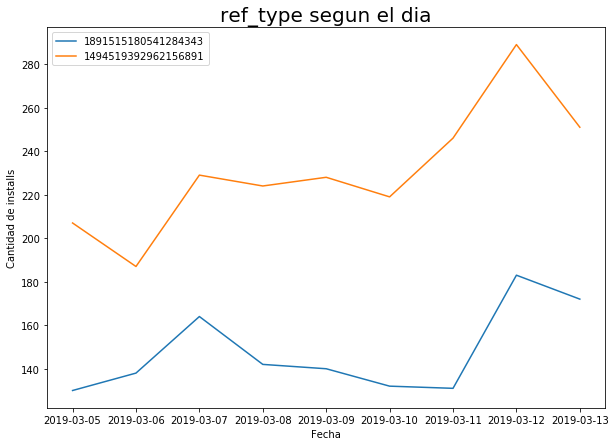

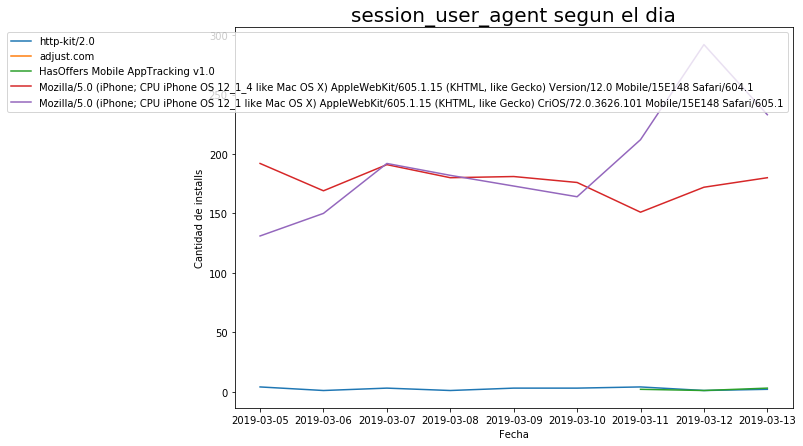

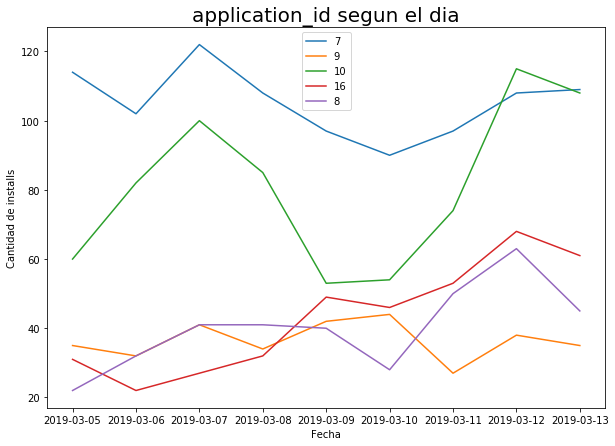

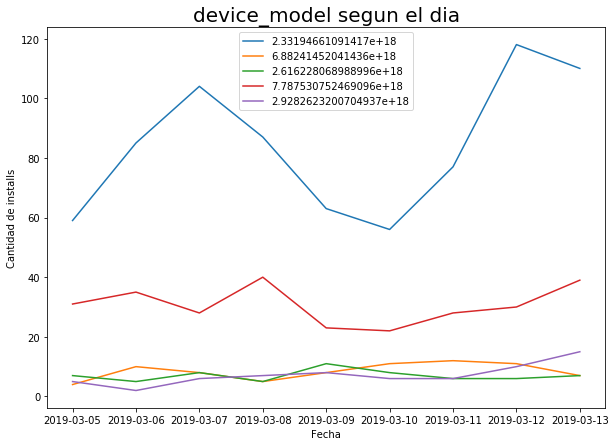

In [10]:
installs['ocurrencias'] = 1

for i in top5.keys():
    if i != 'day':
        installs.loc[installs[i].isin(top5[i])][['day',i, 'ocurrencias']].groupby(['day',i]).count().unstack().plot(figsize = (10,7))
        plt.ylabel('Cantidad de installs')
        plt.xlabel('Fecha')
        plt.title(i + ' segun el dia',fontsize=20)
        plt.legend(top5[i])
        plt.savefig('installs/lineplot_top5' + i + '.png', bbox_inches = 'tight')

## Vemos un heatmap de fecha y hora mostrando la cantidad de registros filtrados para cada valor comun de las columnas

/home/gonzalo/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


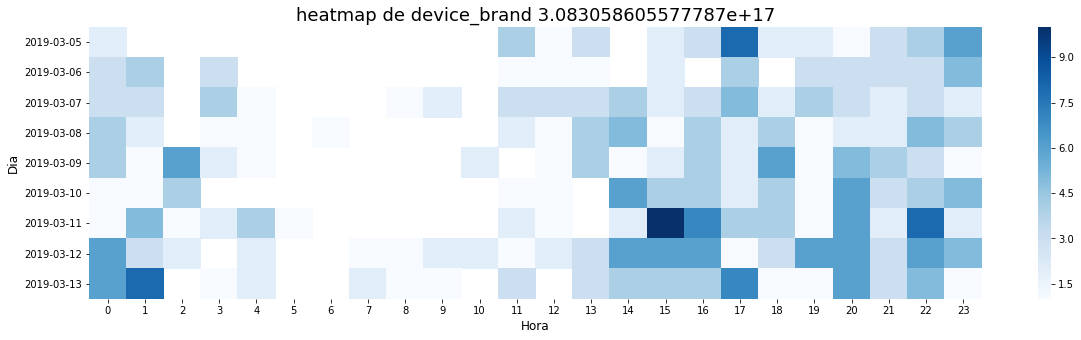

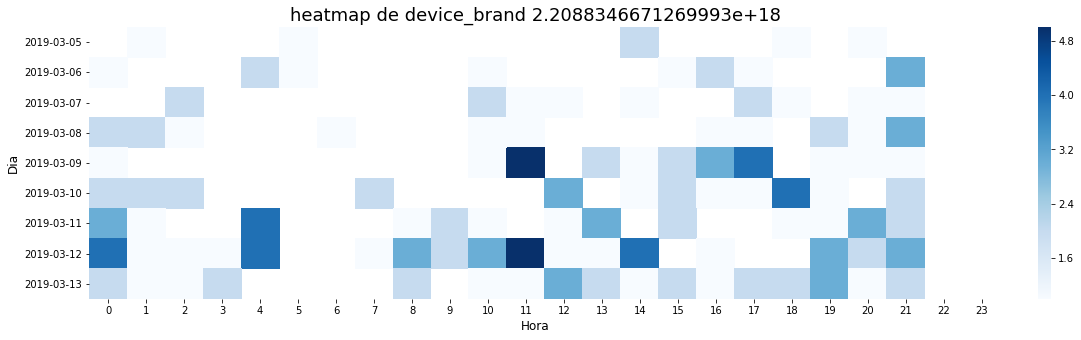

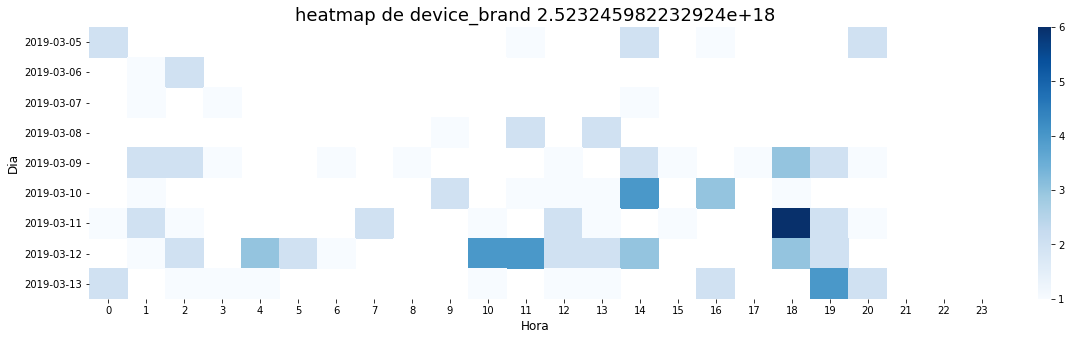

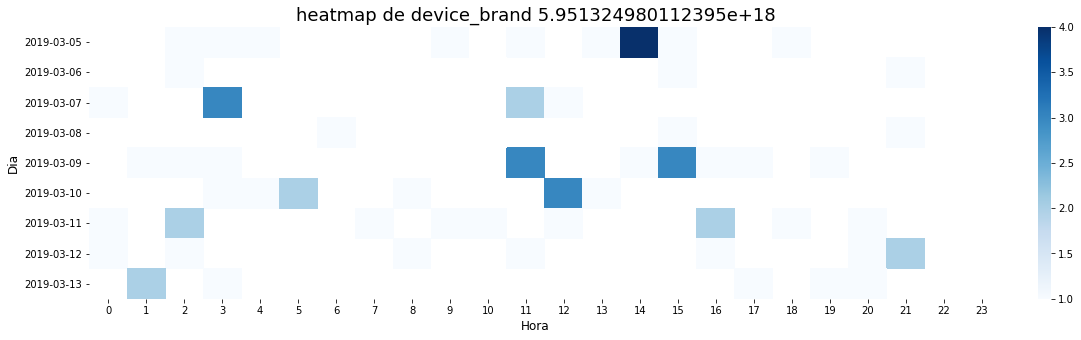

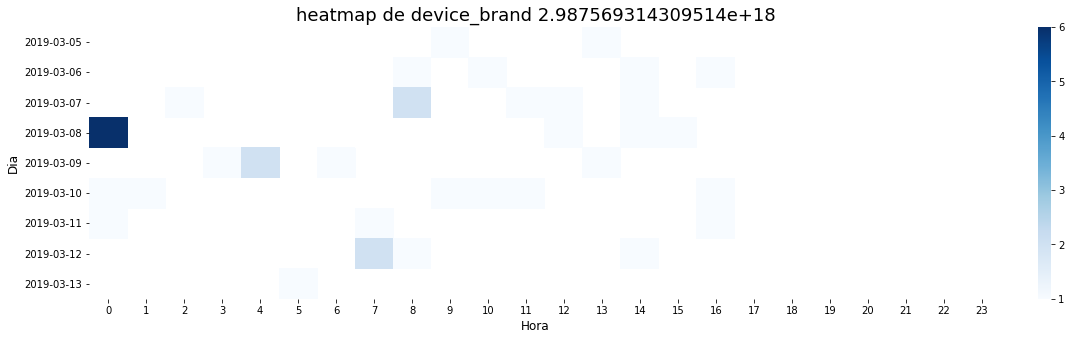

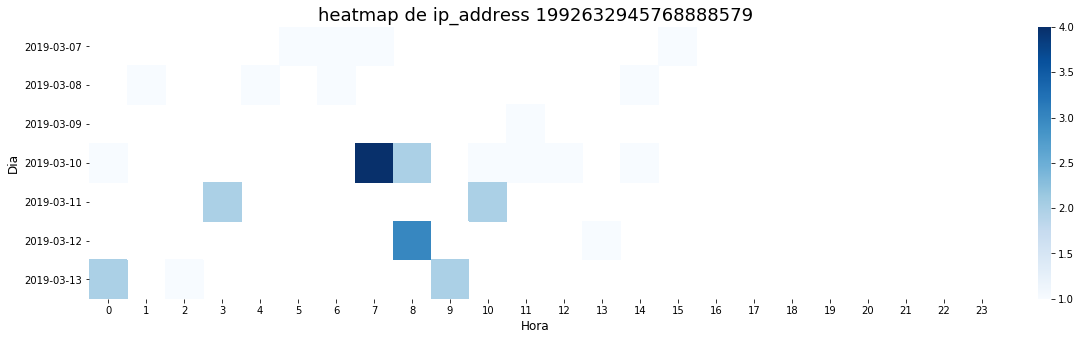

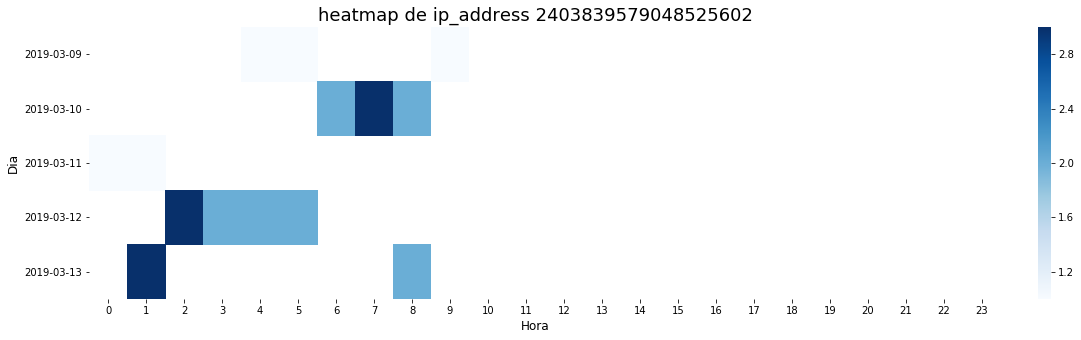

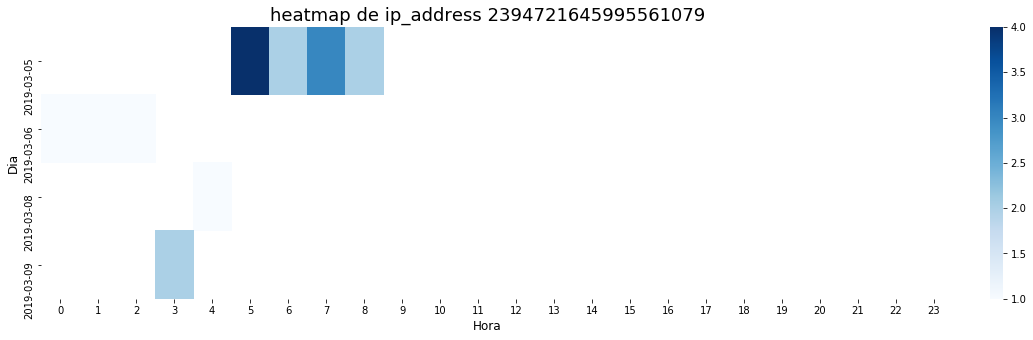

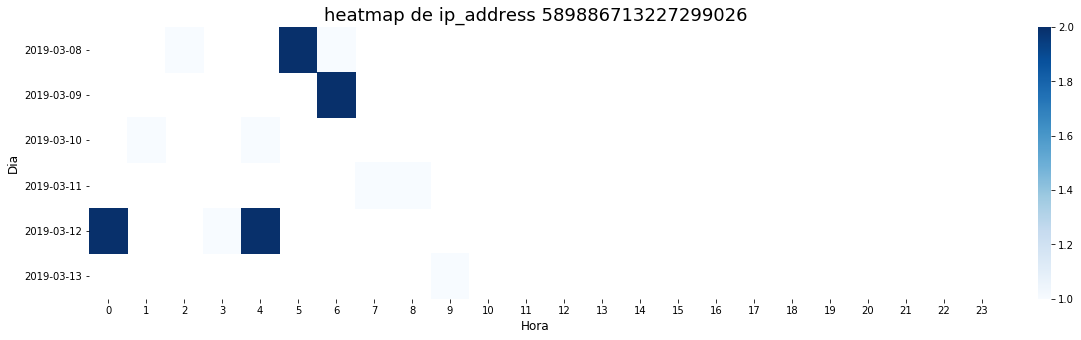

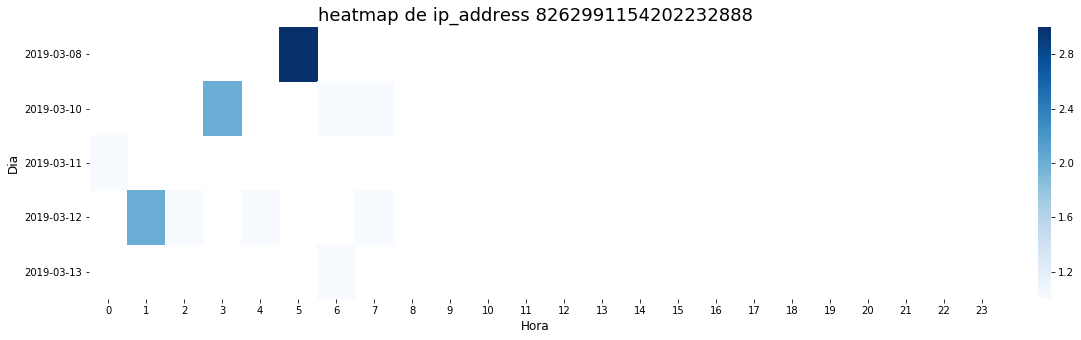

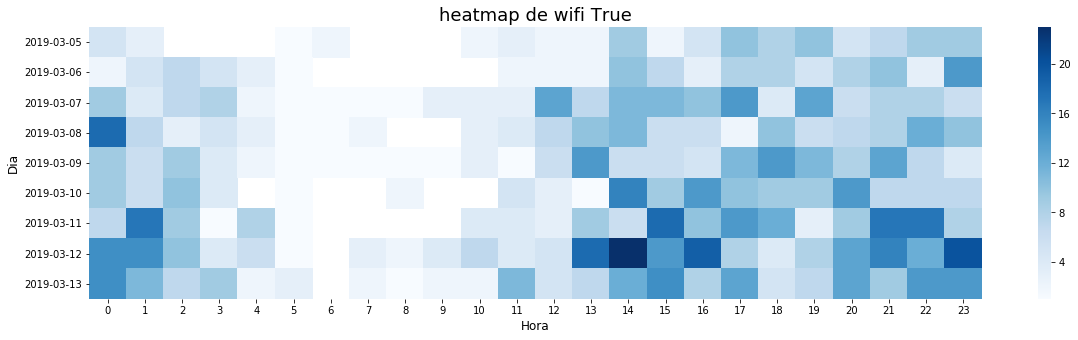

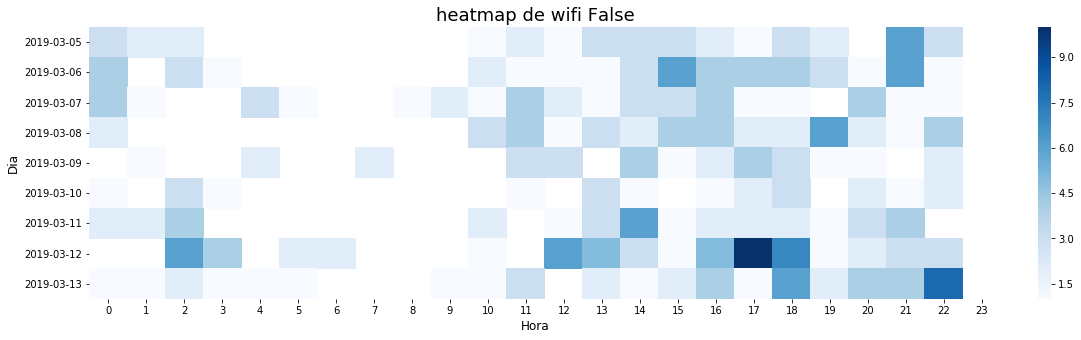

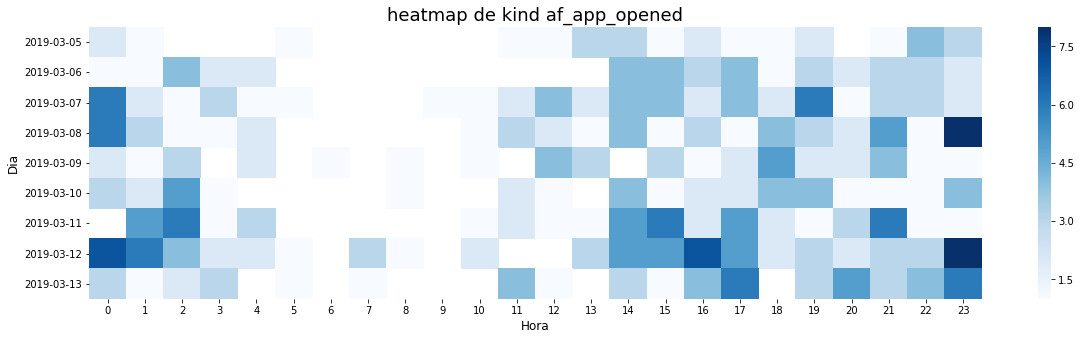

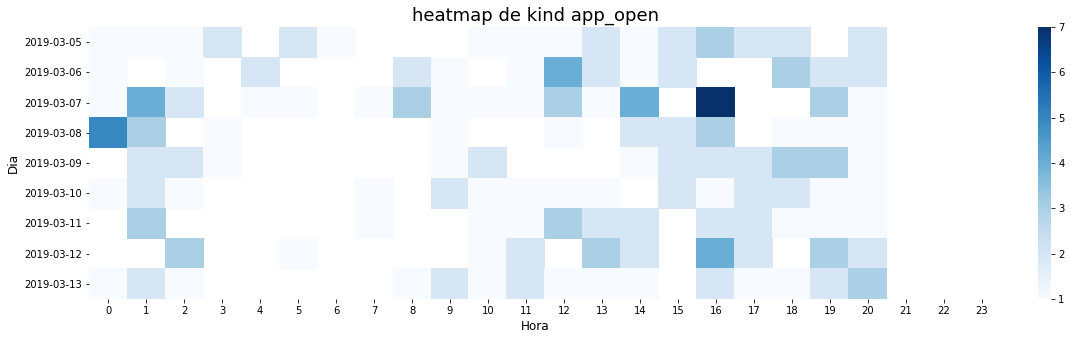

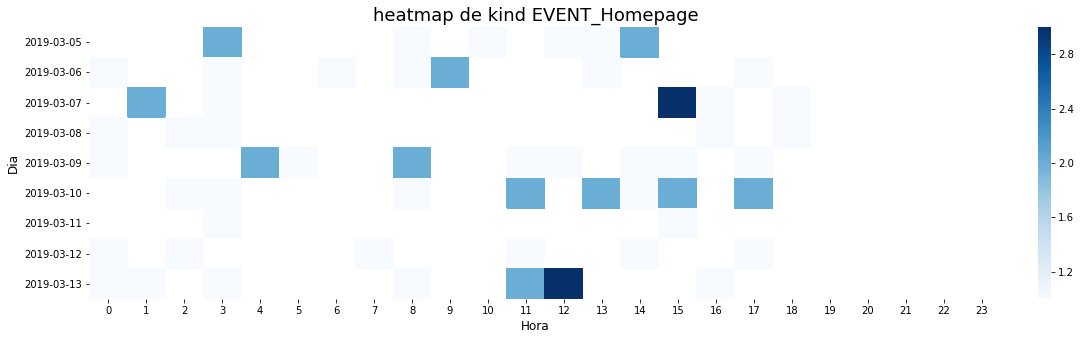

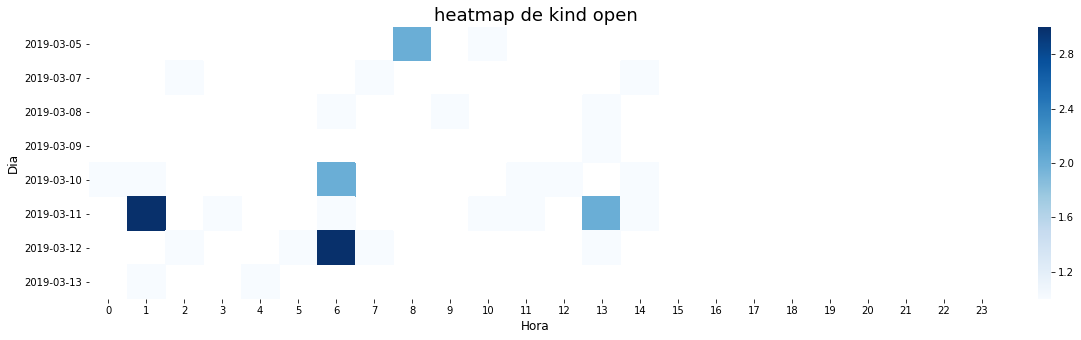

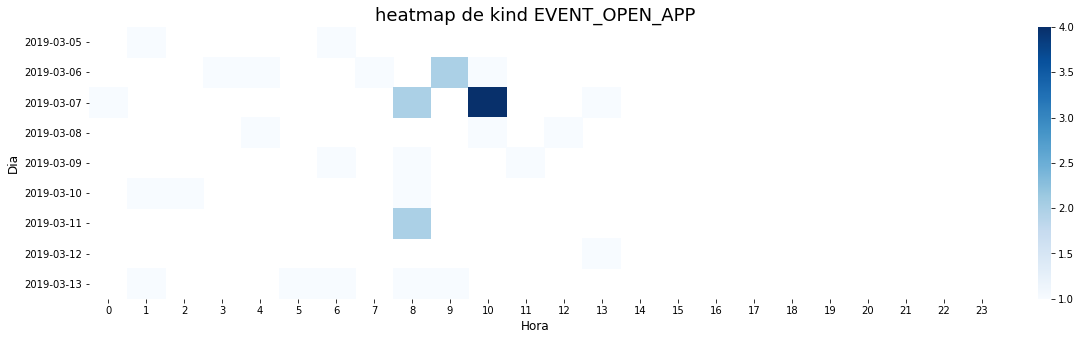

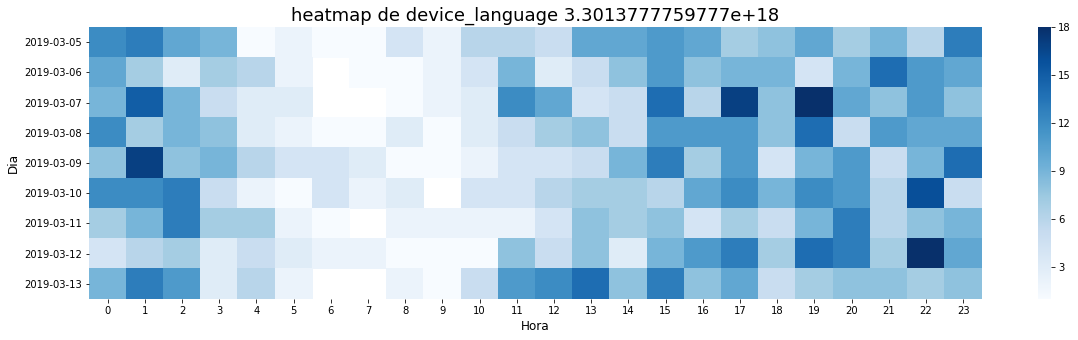

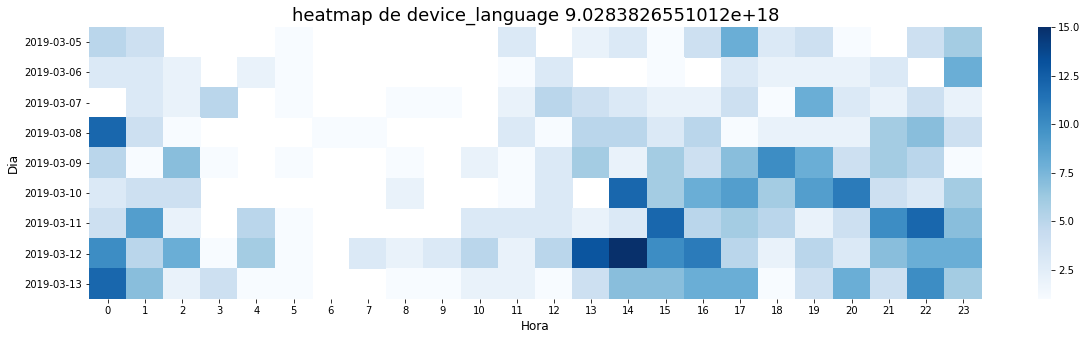

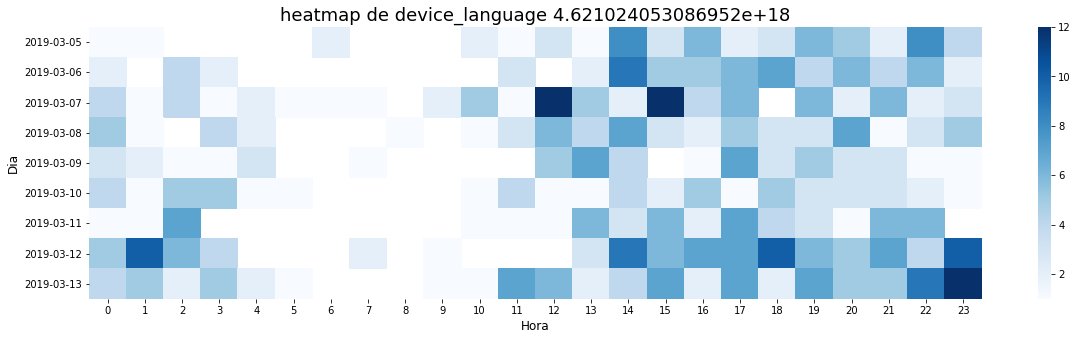

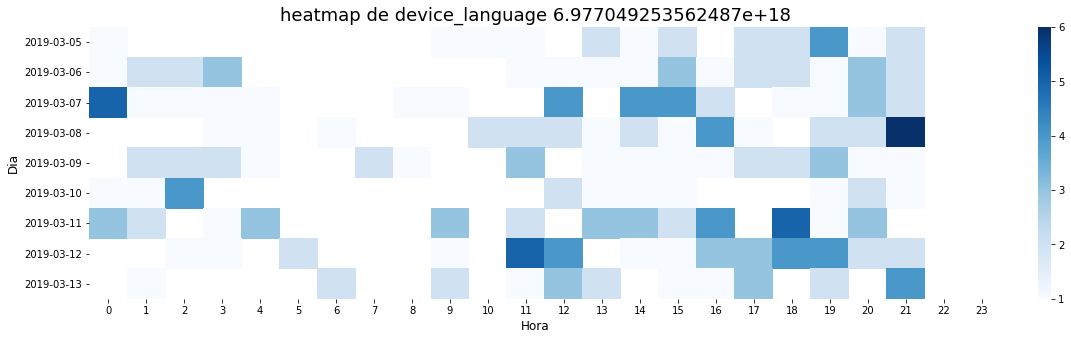

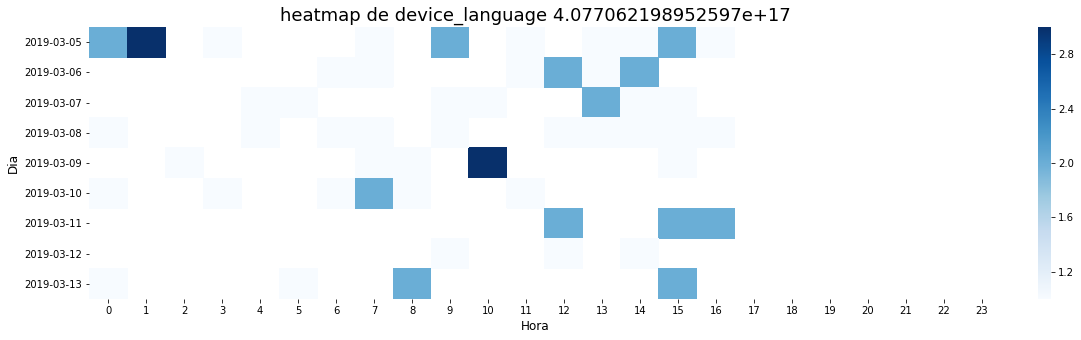

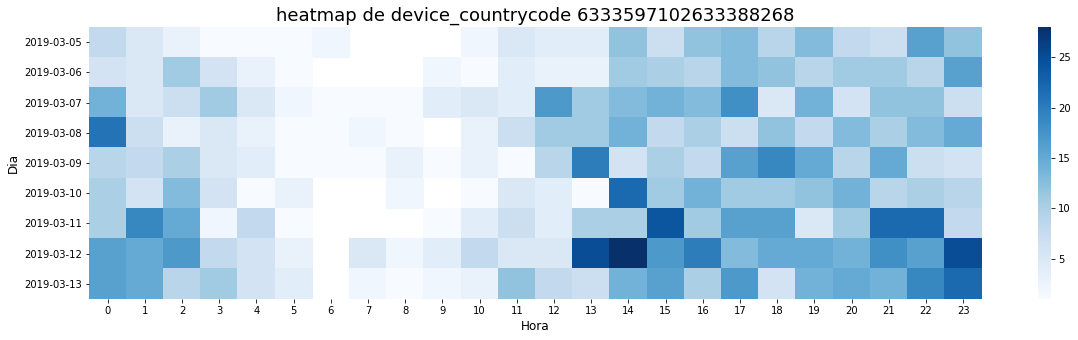

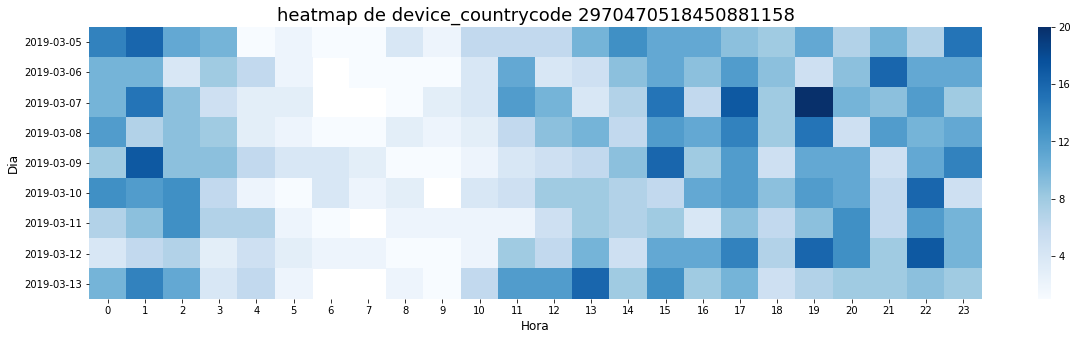

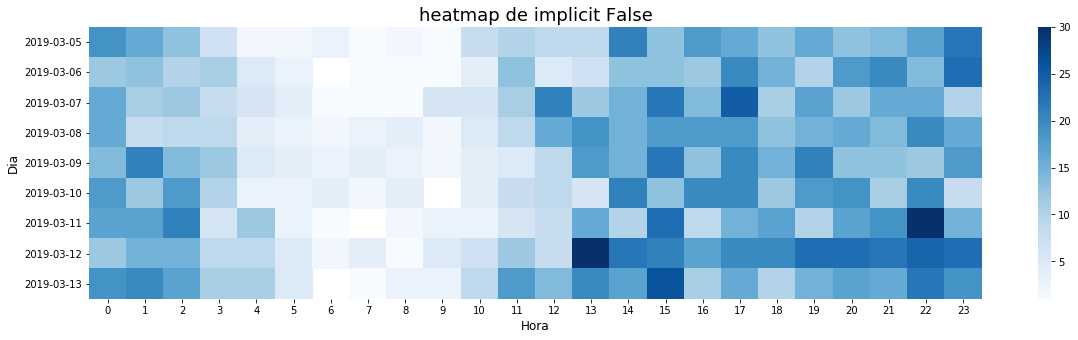

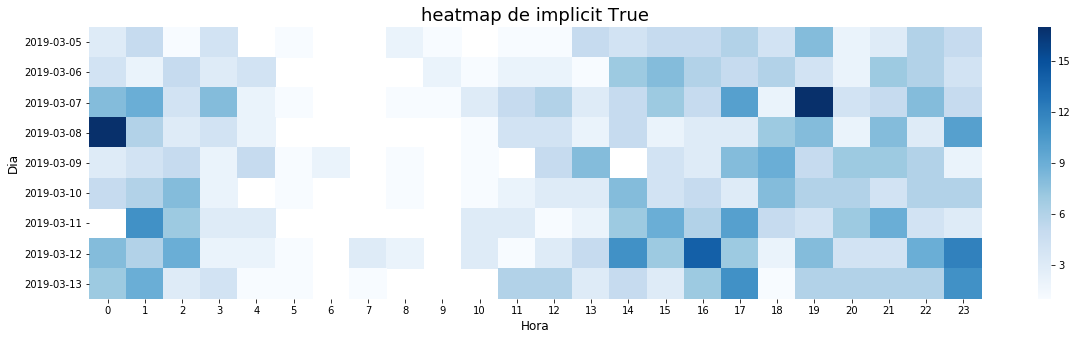

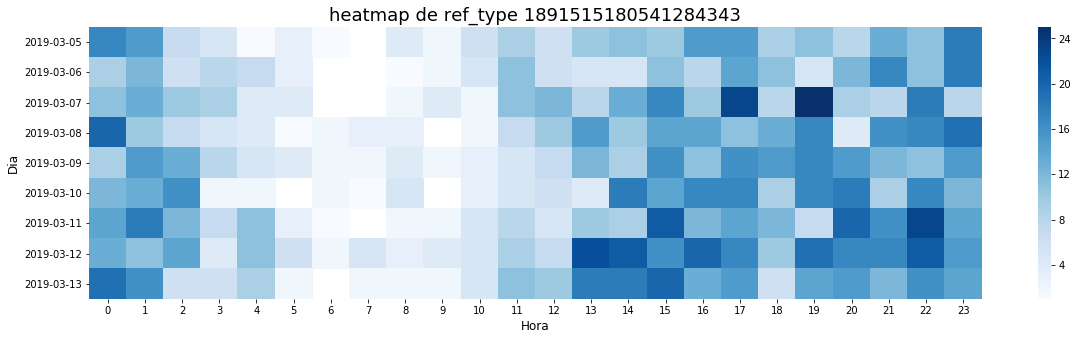

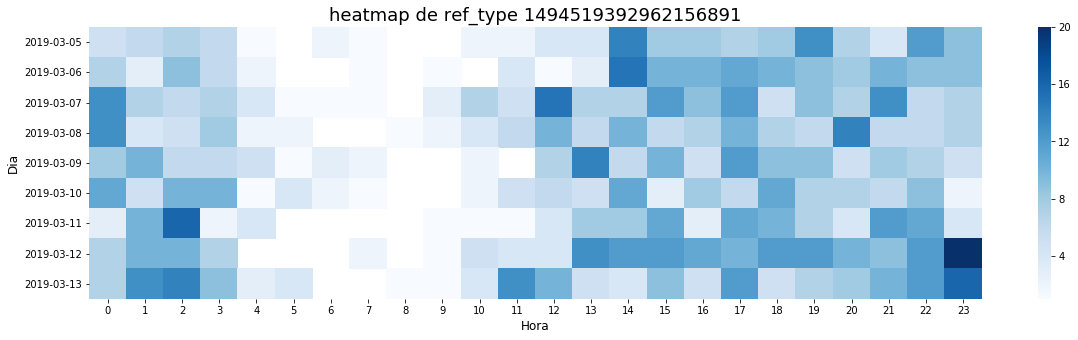

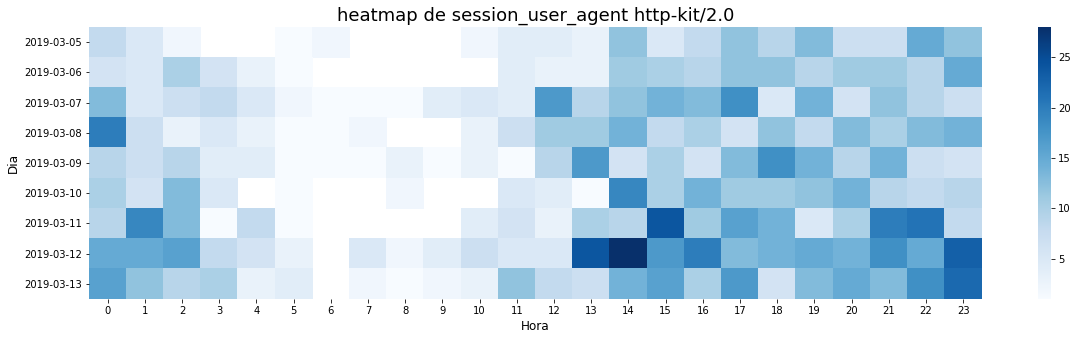

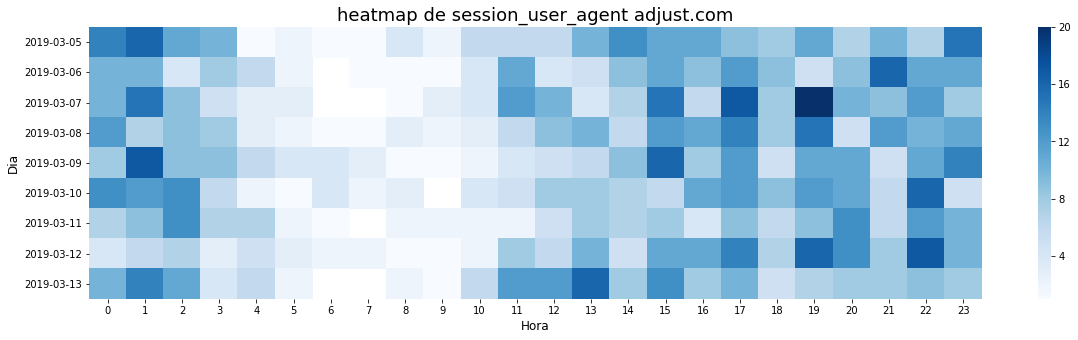

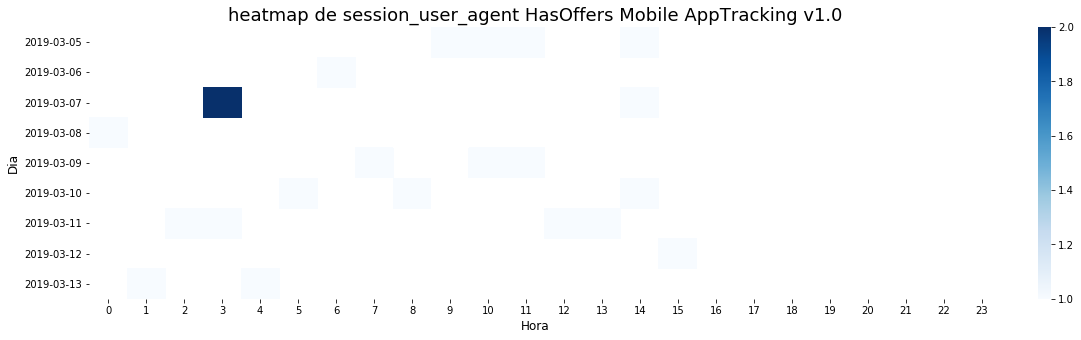

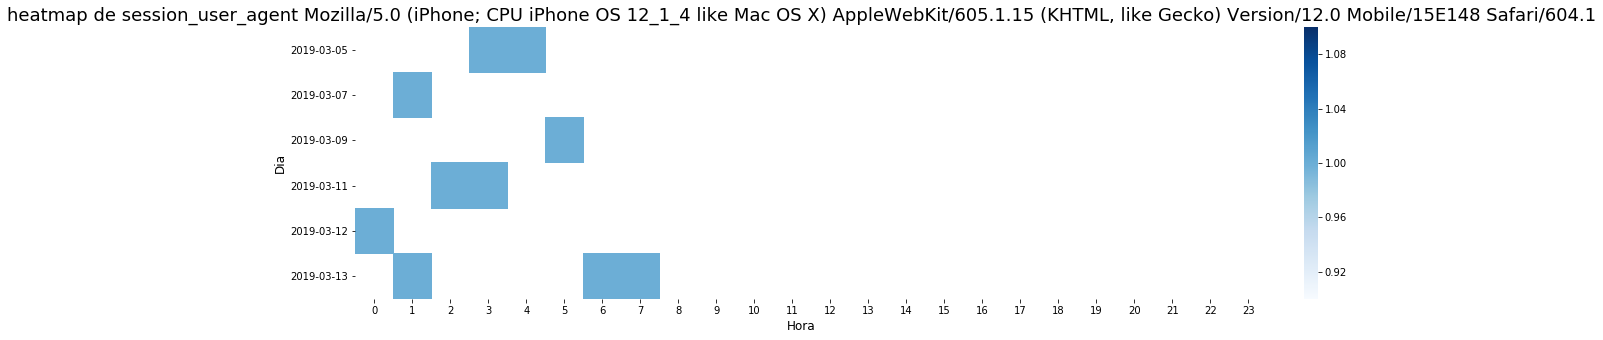

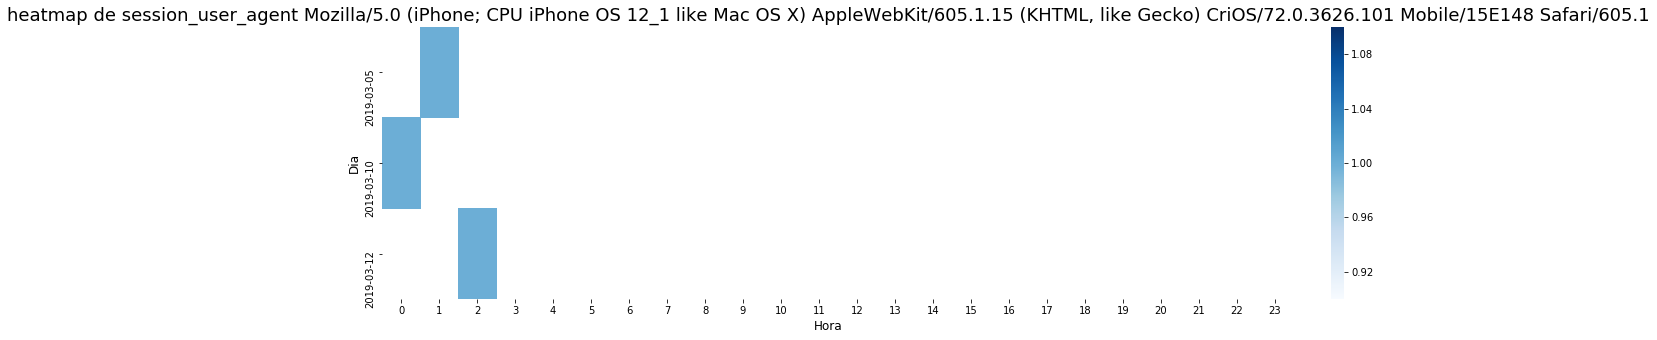

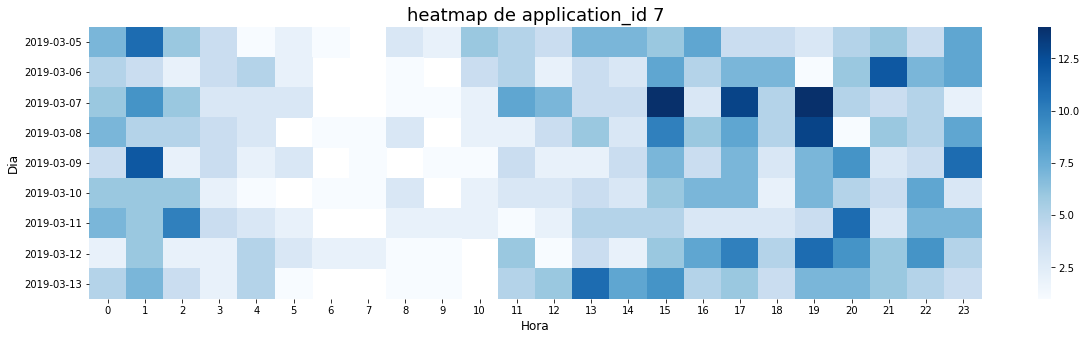

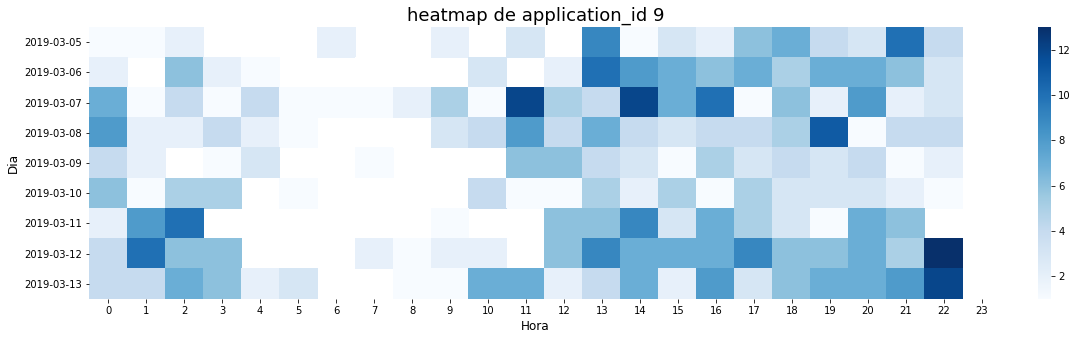

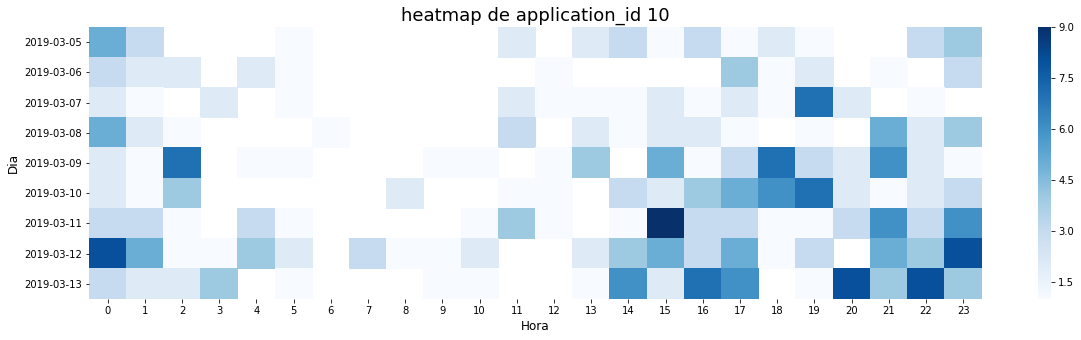

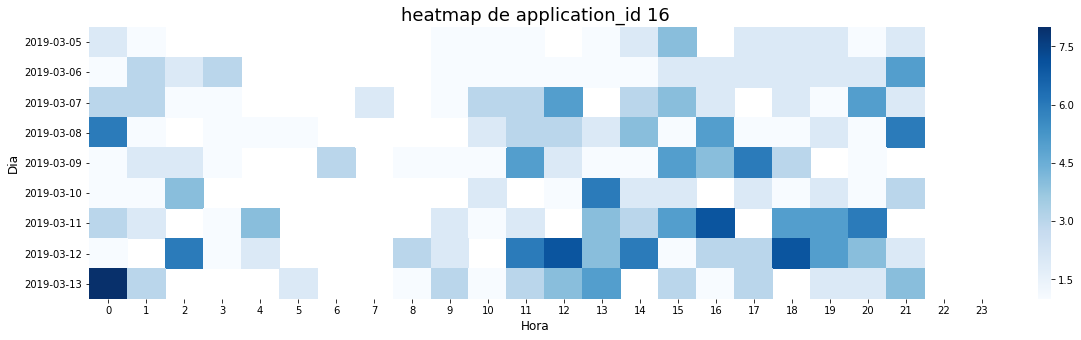

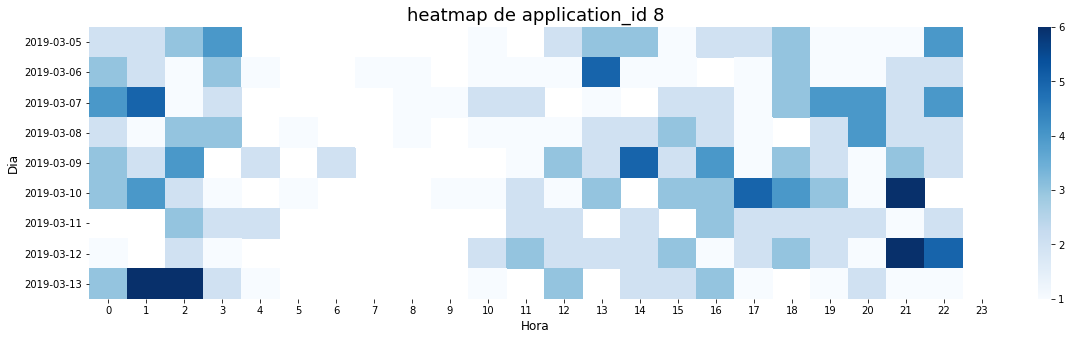

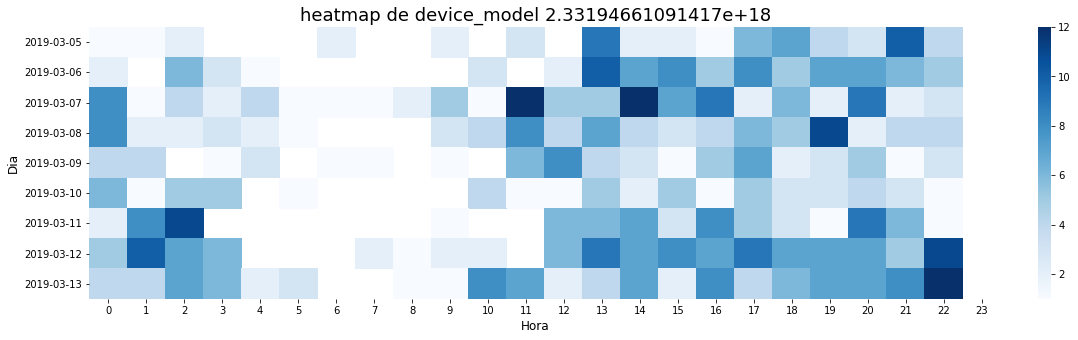

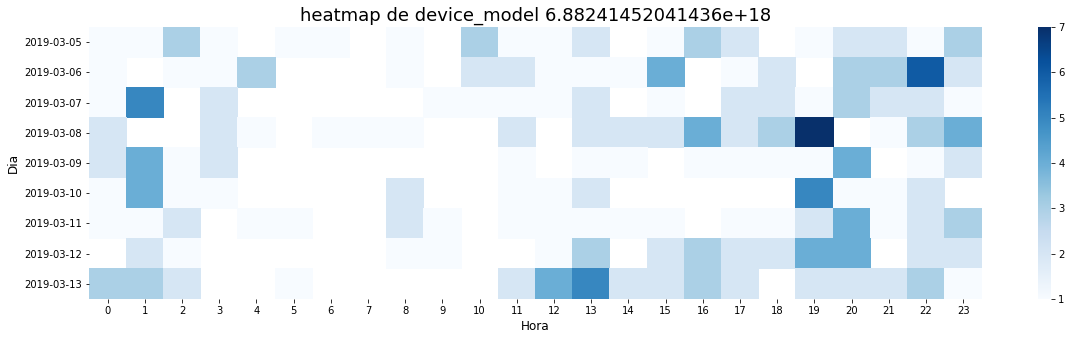

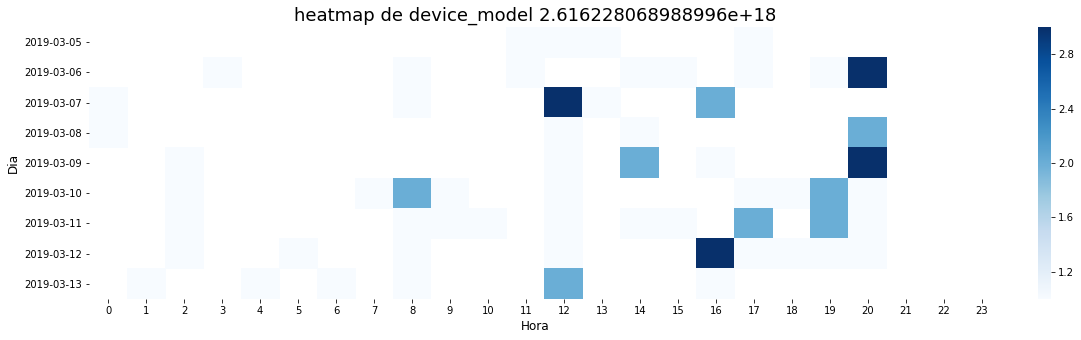

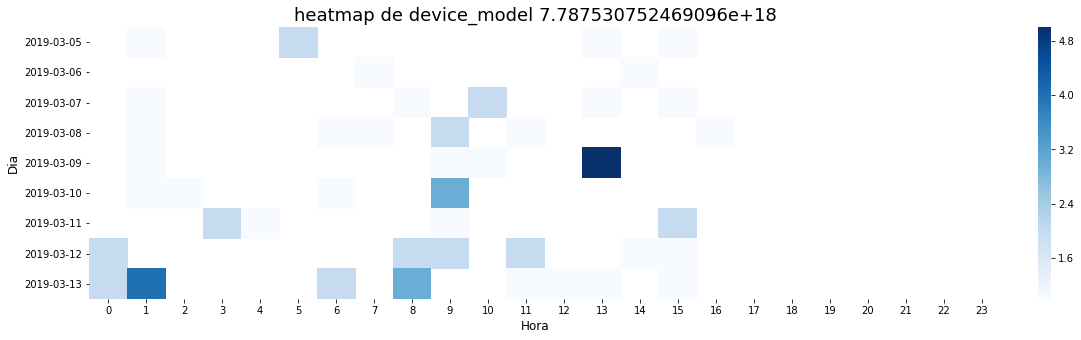

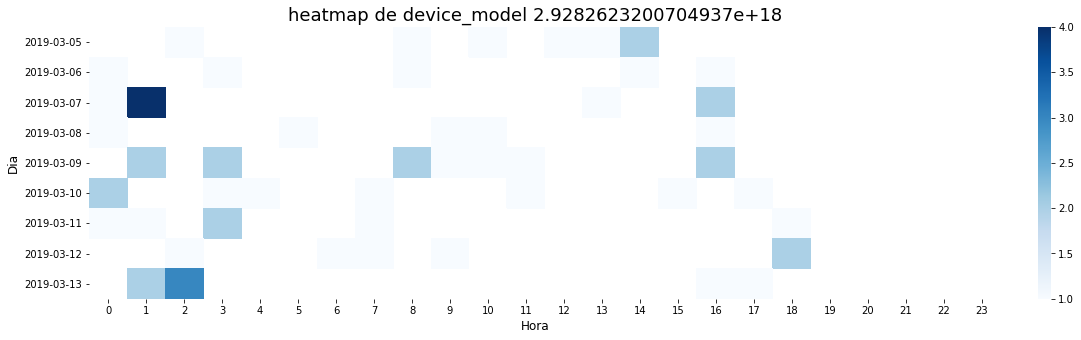

In [11]:
for i in top5.keys():
    for j in top5[i]:
        if i != 'day' and i != 'hour':
            matriz = installs.loc[installs[i]==j][['day','hour', 'ocurrencias']].groupby(['day','hour']).count().unstack()
            fig, ax = plt.subplots(figsize=(20,5))
            plt.title('heatmap de ' + str(i) + ' ' + str(j), fontsize = 18)
            ax.set_xticks([])
            ax.set_yticks([])
            etiquetaX=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
            sns.heatmap(matriz,xticklabels=etiquetaX,fmt="", cmap='Blues',ax=ax);
            ax.set_ylabel("Dia",fontsize=12)
            ax.set_xlabel("Hora",fontsize=12)